In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
EXPERIMENT_FOLDER = Path("../experiment_results")
GRID_SEARCH_RESULTS = EXPERIMENT_FOLDER / "grid_search_results.csv"
MNIST_RESULTS = EXPERIMENT_FOLDER / "mnist.csv"
FASHION_MNIST_RESULTS = EXPERIMENT_FOLDER / "fashion_mnist.csv"

In [4]:
ALGORITHMS_TO_KEEP = ["gd", "dfa", "drtp"]
ACTIVATIONS_TO_KEEP = ["tanh", "signsat"]
ALGO_ORDER = ["BP", "DFA", "DRTP"]

In [5]:
def load_file(path):
    return pd.read_csv(path, usecols=['binarize weights', 'binary weights storage',
       '_runtime', 'initial value',
       'hidden activation function', 'seed',
       'weight clipping',
       'number of parameters', 'epoch', 'number of epochs', 'weight type',
       'architecture', 'algorithm',
       'weight STE', 'hidden sizes', 'learning rate',
       'batch size', 'batch/loss', 'test/f1',
       'train/f1', 'train/accuracy', 'test/accuracy', 'train/precision',
       'test/precision', 'run_id'])

In [6]:
def process_data(df):
    df.drop(["script hash", "cmd args", "test/confusion_table", "HSIC_table"], axis=1, inplace=True, errors="ignore")
    df["run_id"] = df["run_id"].map(str)
    
    processed = df.groupby(["run_id", "epoch"]).first().groupby("run_id").transform(lambda x: x.fillna(x.iloc[0])).reset_index()
    processed = processed.loc[processed["algorithm"].isin(ALGORITHMS_TO_KEEP)]

    # remove unused activation functions
    processed = processed.loc[processed["hidden activation function"].isin(ACTIVATIONS_TO_KEEP)]

    processed["activation"] = processed["hidden activation function"].map(lambda x: "sign" if x == "signsat" else x)
    
    processed["algorithm"] = processed["algorithm"].str.upper()
    processed["algorithm"] = processed["algorithm"].map(lambda x: "BP" if x=="GD" else x)
    
    return processed
    

# MNIST

In [7]:
df = load_file(GRID_SEARCH_RESULTS)

c:\users\crulis\pycharmprojects\binary_nn_tests\venv\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (6,9,14,17,23,24,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [8]:
len(df)

8424180

In [9]:
df.columns

Index(['binarize weights', 'binary weights storage', '_runtime',
       'initial value', 'hidden activation function', 'seed',
       'weight clipping', 'number of parameters', 'epoch', 'number of epochs',
       'weight type', 'architecture', 'algorithm', 'weight STE',
       'hidden sizes', 'learning rate', 'batch size', 'batch/loss', 'test/f1',
       'train/f1', 'train/accuracy', 'test/accuracy', 'train/precision',
       'test/precision', 'run_id'],
      dtype='object')

In [10]:
df2 = process_data(df)

In [11]:
df2

,run_id,epoch,binarize weights,binary weights storage,_runtime,initial value,hidden activation function,seed,weight clipping,number of parameters,...,learning rate,batch size,batch/loss,test/f1,train/f1,train/accuracy,test/accuracy,train/precision,test/precision,activation
200,0gdhei3u,0,False,False,6,0.001,signsat,1.0,none,1110800.0,...,0.000001,128.0,1.000325,0.412387,0.405234,0.523983,0.5290,0.438656,0.470379,sign
201,0gdhei3u,1,False,False,29,0.001,signsat,1.0,none,1110800.0,...,0.000001,128.0,0.322440,0.810016,0.806915,0.815950,0.8185,0.823586,0.826990,sign
202,0gdhei3u,2,False,False,52,0.001,signsat,1.0,none,1110800.0,...,0.000001,128.0,0.181400,0.869579,0.864948,0.867183,0.8719,0.865383,0.869840,sign
203,0gdhei3u,3,False,False,75,0.001,signsat,1.0,none,1110800.0,...,0.000001,128.0,0.146565,0.884034,0.878290,0.879833,0.8856,0.878522,0.884446,sign
204,0gdhei3u,4,False,False,98,0.001,signsat,1.0,none,1110800.0,...,0.000001,128.0,0.108540,0.891863,0.887176,0.888517,0.8932,0.887320,0.892073,sign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17695,zehnonkp,95,True,False,12872,0.100,signsat,1.0,none,1110800.0,...,0.000100,128.0,0.036167,0.921069,0.921598,0.922783,0.9223,0.921890,0.921752,sign
17696,zehnonkp,96,True,False,12992,0.100,signsat,1.0,none,1110800.0,...,0.000100,128.0,0.043116,0.919958,0.921326,0.922400,0.9210,0.921774,0.920721,sign
17697,zehnonkp,97,True,False,13113,0.100,signsat,1.0,none,1110800.0,...,0.000100,128.0,0.048783,0.921155,0.922240,0.923317,0.9223,0.922215,0.921160,sign
17698,zehnonkp,98,True,False,13234,0.100,signsat,1.0,none,1110800.0,...,0.000100,128.0,0.060914,0.919650,0.920762,0.921833,0.9208,0.920795,0.919607,sign


In [12]:
df2.columns
#df2.groupby(["binarize weights", "epoch"]).mean()

Index(['run_id', 'epoch', 'binarize weights', 'binary weights storage',
       '_runtime', 'initial value', 'hidden activation function', 'seed',
       'weight clipping', 'number of parameters', 'number of epochs',
       'weight type', 'architecture', 'algorithm', 'weight STE',
       'hidden sizes', 'learning rate', 'batch size', 'batch/loss', 'test/f1',
       'train/f1', 'train/accuracy', 'test/accuracy', 'train/precision',
       'test/precision', 'activation'],
      dtype='object')

In [13]:
df2["algorithm"].unique()

array(['DFA', 'BP', 'DRTP'], dtype=object)

In [14]:
df2["activation"].unique()

array(['sign', 'tanh'], dtype=object)

In [15]:
df_mean = df2.groupby(["epoch"]).aggregate(
    mean=("train/accuracy", np.mean),
    std=("train/accuracy", np.std)
).reset_index()
df_mean["std"] *= 0.5

In [16]:
df_mean

,epoch,mean,std
0,0,0.421522,0.161228
1,1,0.496537,0.170718
2,2,0.541389,0.172653
3,3,0.568557,0.172137
4,4,0.586331,0.172487
...,...,...,...
95,95,0.741993,0.169989
96,96,0.741018,0.170683
97,97,0.742913,0.169424
98,98,0.745363,0.167544


<ErrorbarContainer object of 3 artists>

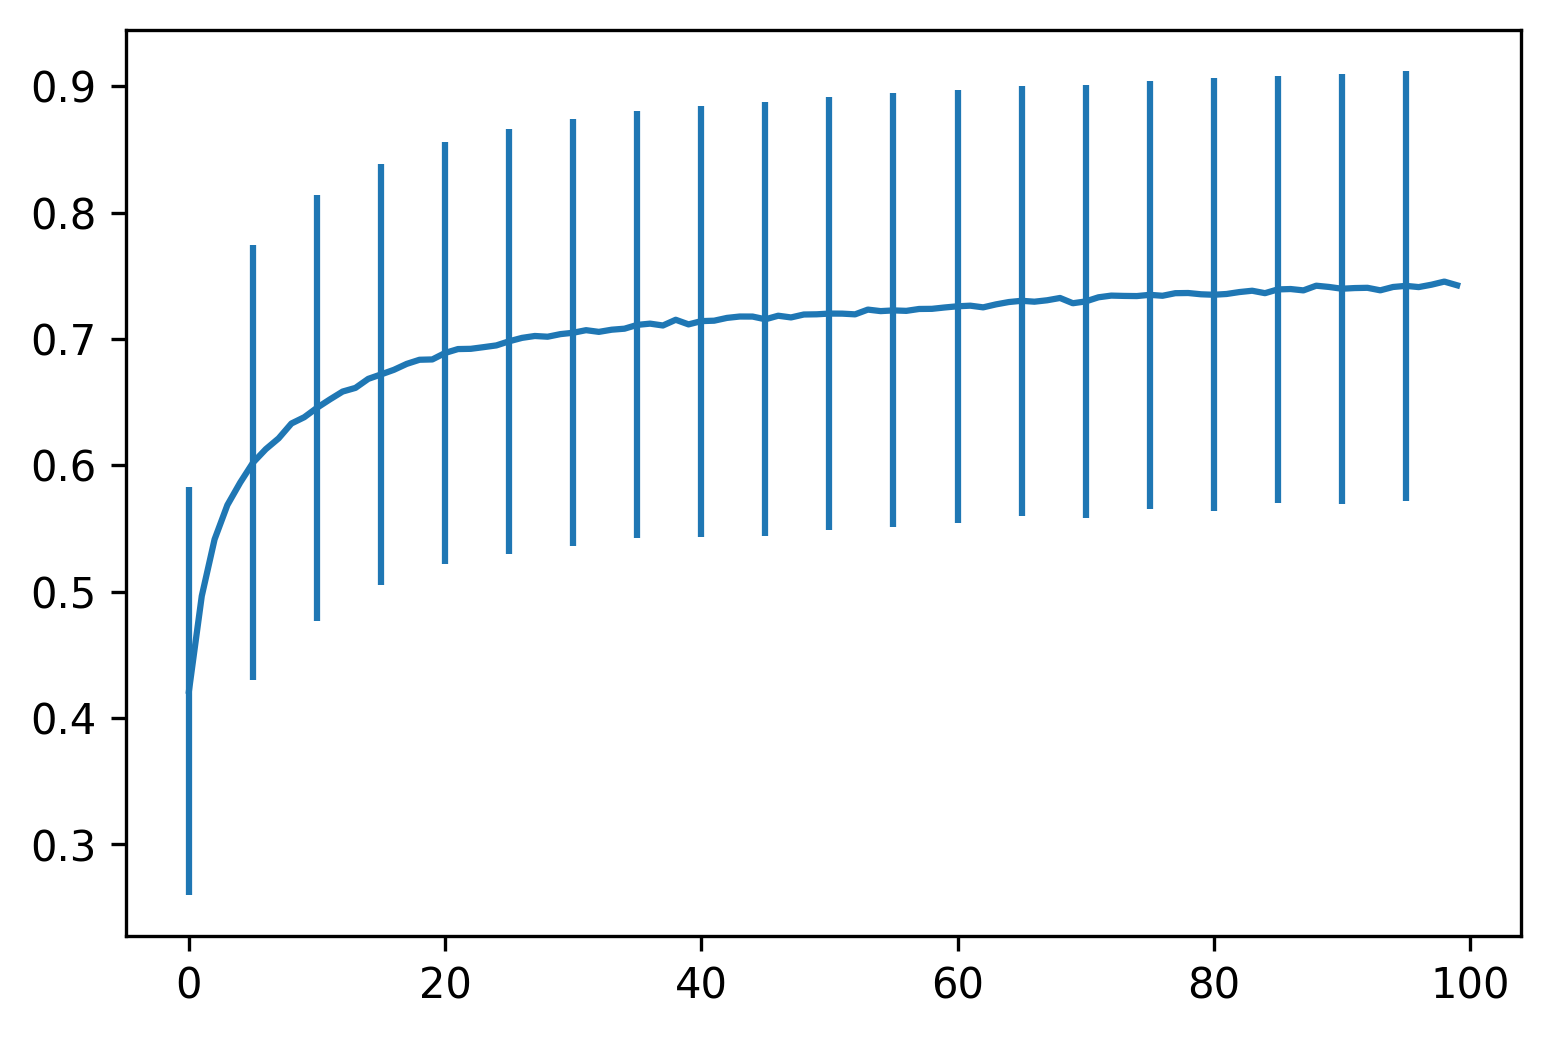

In [17]:
plt.errorbar("epoch", "mean", yerr="std", data=df_mean, errorevery=5)

In [18]:
best_runs = df2.groupby(["seed", "algorithm", "binarize weights", "hidden activation function", "initial value", "learning rate"], as_index=False).max()
best_runs.rename(columns={"train/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")

In [19]:
best_runs

,seed,algorithm,binary weights,hidden activation function,initial value,learning rate,run_id,epoch,binary weights storage,_runtime,...,hidden sizes,batch size,batch/loss,test/f1,train/f1,accuracy,test/accuracy,train/precision,test/precision,activation
0,1.0,BP,False,signsat,0.001,0.000001,uaheppf2,99,False,15077,...,"700,500,300,200",128.0,0.999683,0.860014,0.862451,0.864917,0.8627,0.862715,0.860145,sign
1,1.0,BP,False,signsat,0.001,0.000010,h76ffk2y,99,False,2234,...,"700,500,300,200",128.0,0.999683,0.926093,0.946957,0.947600,0.9272,0.947114,0.926510,sign
2,1.0,BP,False,signsat,0.001,0.000100,6y4m5bo7,99,False,1598,...,"700,500,300,200",128.0,0.999683,0.961816,0.978081,0.978267,0.9622,0.978062,0.961945,sign
3,1.0,BP,False,signsat,0.100,0.000001,5jqjd0wq,99,False,16715,...,"700,500,300,200",128.0,1.291557,0.873295,0.871183,0.873300,0.8754,0.871220,0.873149,sign
4,1.0,BP,False,signsat,0.100,0.000010,deoltl1f,99,False,16709,...,"700,500,300,200",128.0,1.291557,0.946844,0.961620,0.961983,0.9474,0.961631,0.946921,sign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.0,DRTP,True,tanh,0.001,0.000010,g033g9g2,99,False,9147,...,"700,500,300,200",128.0,1.001479,0.925121,0.924628,0.925733,0.9261,0.924796,0.925376,tanh
68,1.0,DRTP,True,tanh,0.001,0.000100,ss54j3u0,99,False,11352,...,"700,500,300,200",128.0,1.001479,0.020386,0.020203,0.112367,0.1135,0.011237,0.011350,tanh
69,1.0,DRTP,True,tanh,0.100,0.000001,md5451rp,99,False,10564,...,"700,500,300,200",128.0,1.379031,0.602590,0.596868,0.628250,0.6338,0.602842,0.608671,tanh
70,1.0,DRTP,True,tanh,0.100,0.000010,e25kytfk,99,False,12720,...,"700,500,300,200",128.0,1.379031,0.902658,0.899540,0.900817,0.9042,0.899561,0.903113,tanh


In [20]:
df["algorithm"].unique()

array(['gd', nan, 'drtp', 'dltp', 'dle', 'dfa'], dtype=object)

In [21]:
best_runs.pivot("run_id", ["algorithm", "binary weights"], "accuracy")

algorithm           BP                 DFA                DRTP          
binary weights   False      True     False      True     False      True
run_id                                                                  
0gdhei3u           NaN       NaN  0.960383       NaN       NaN       NaN
1uaj668b           NaN  0.899833       NaN       NaN       NaN       NaN
2f2r1gsg           NaN       NaN  0.983767       NaN       NaN       NaN
36sakrjl           NaN       NaN       NaN  0.112433       NaN       NaN
3jlwzl7m           NaN       NaN       NaN       NaN  0.913667       NaN
...                ...       ...       ...       ...       ...       ...
xdwlmw4p           NaN       NaN  0.991017       NaN       NaN       NaN
xff95kow        0.9328       NaN       NaN       NaN       NaN       NaN
yu63ded6           NaN       NaN       NaN  0.973767       NaN       NaN
z9szvnfl           NaN  0.568500       NaN       NaN       NaN       NaN
zehnonkp           NaN       NaN       NaN       NaN       NaN  0.923967

[72 rows x 6 columns]

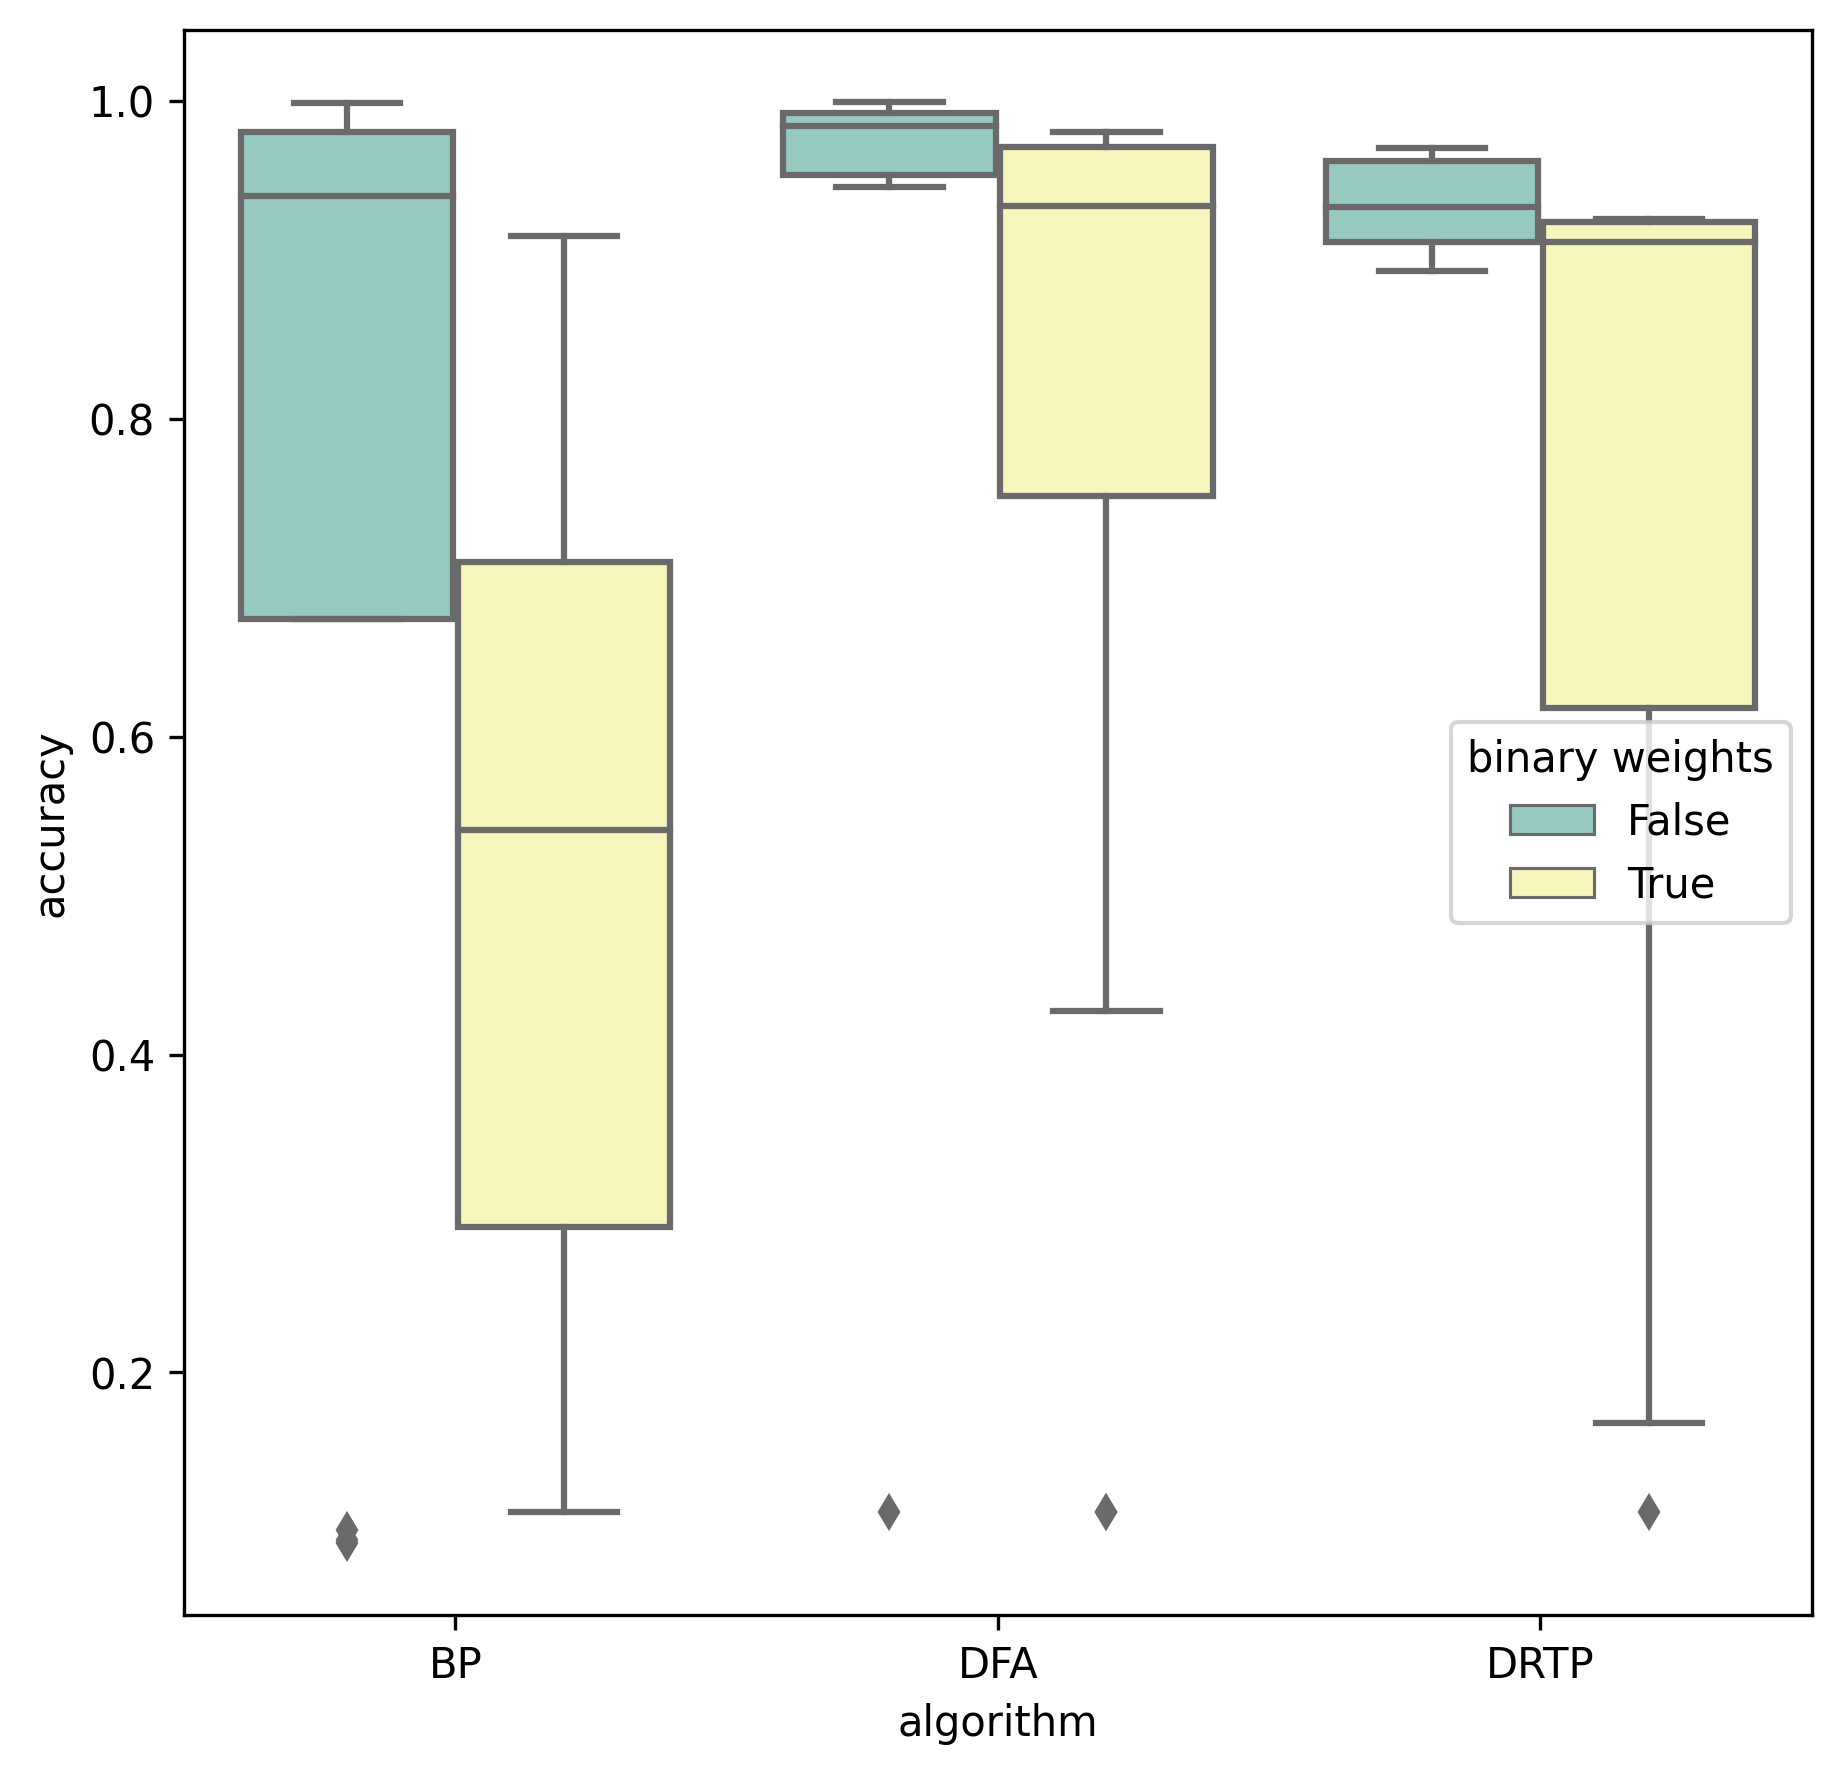

In [22]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="binary weights", data=best_runs, palette="Set3",
           order=ALGO_ORDER)

plt.legend(title="binary weights", loc="center right")
plt.gcf().set_size_inches(7, 7)
#sns.swarmplot(x="algorithm", y="train/accuracy", data=best_runs, color=".25")

# MNIST analysis

In [23]:
mdf = load_file(MNIST_RESULTS)

c:\users\crulis\pycharmprojects\binary_nn_tests\venv\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (6,9,14,17,23,24,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [24]:
mdf2 = process_data(mdf)

In [25]:
mdf2.describe()

,epoch,_runtime,initial value,seed,number of parameters,number of epochs,learning rate,batch size,batch/loss,test/f1,train/f1,train/accuracy,test/accuracy,train/precision,test/precision
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.0,12000.0,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,49.500000,3587.803833,0.05875,6.500000,1110800.0,100.0,0.000069,128.0,0.066315,0.893589,0.902936,0.906297,0.897084,0.903665,0.894449
std,28.867273,4305.910950,0.04881,2.872401,0.0,0.0,0.000045,0.0,0.139344,0.156251,0.162119,0.153544,0.147795,0.161094,0.155198
min,0.000000,5.000000,0.00100,2.000000,1110800.0,100.0,0.000001,128.0,0.000005,0.109935,0.109447,0.109767,0.111200,0.108564,0.111630
25%,24.750000,1036.000000,0.00100,4.000000,1110800.0,100.0,0.000010,128.0,0.010371,0.917664,0.917834,0.918850,0.918800,0.918171,0.918127
50%,49.500000,2311.500000,0.10000,6.500000,1110800.0,100.0,0.000100,128.0,0.030017,0.945573,0.956257,0.956758,0.946400,0.956325,0.945847
75%,74.250000,4617.250000,0.10000,9.000000,1110800.0,100.0,0.000100,128.0,0.057143,0.962883,0.982408,0.982475,0.963300,0.982556,0.963162
max,99.000000,27709.000000,0.10000,11.000000,1110800.0,100.0,0.000100,128.0,1.603431,0.982324,0.999900,0.999900,0.982500,0.999901,0.982325


In [26]:
best_epochs = mdf2.groupby("run_id", as_index=False).max()
best_epochs.rename(columns={"test/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")

In [27]:
best_epochs["weight - activation"] = best_epochs["binary weights"].apply(lambda x: ("binary " if x else "continuous ")) + best_epochs["activation"]

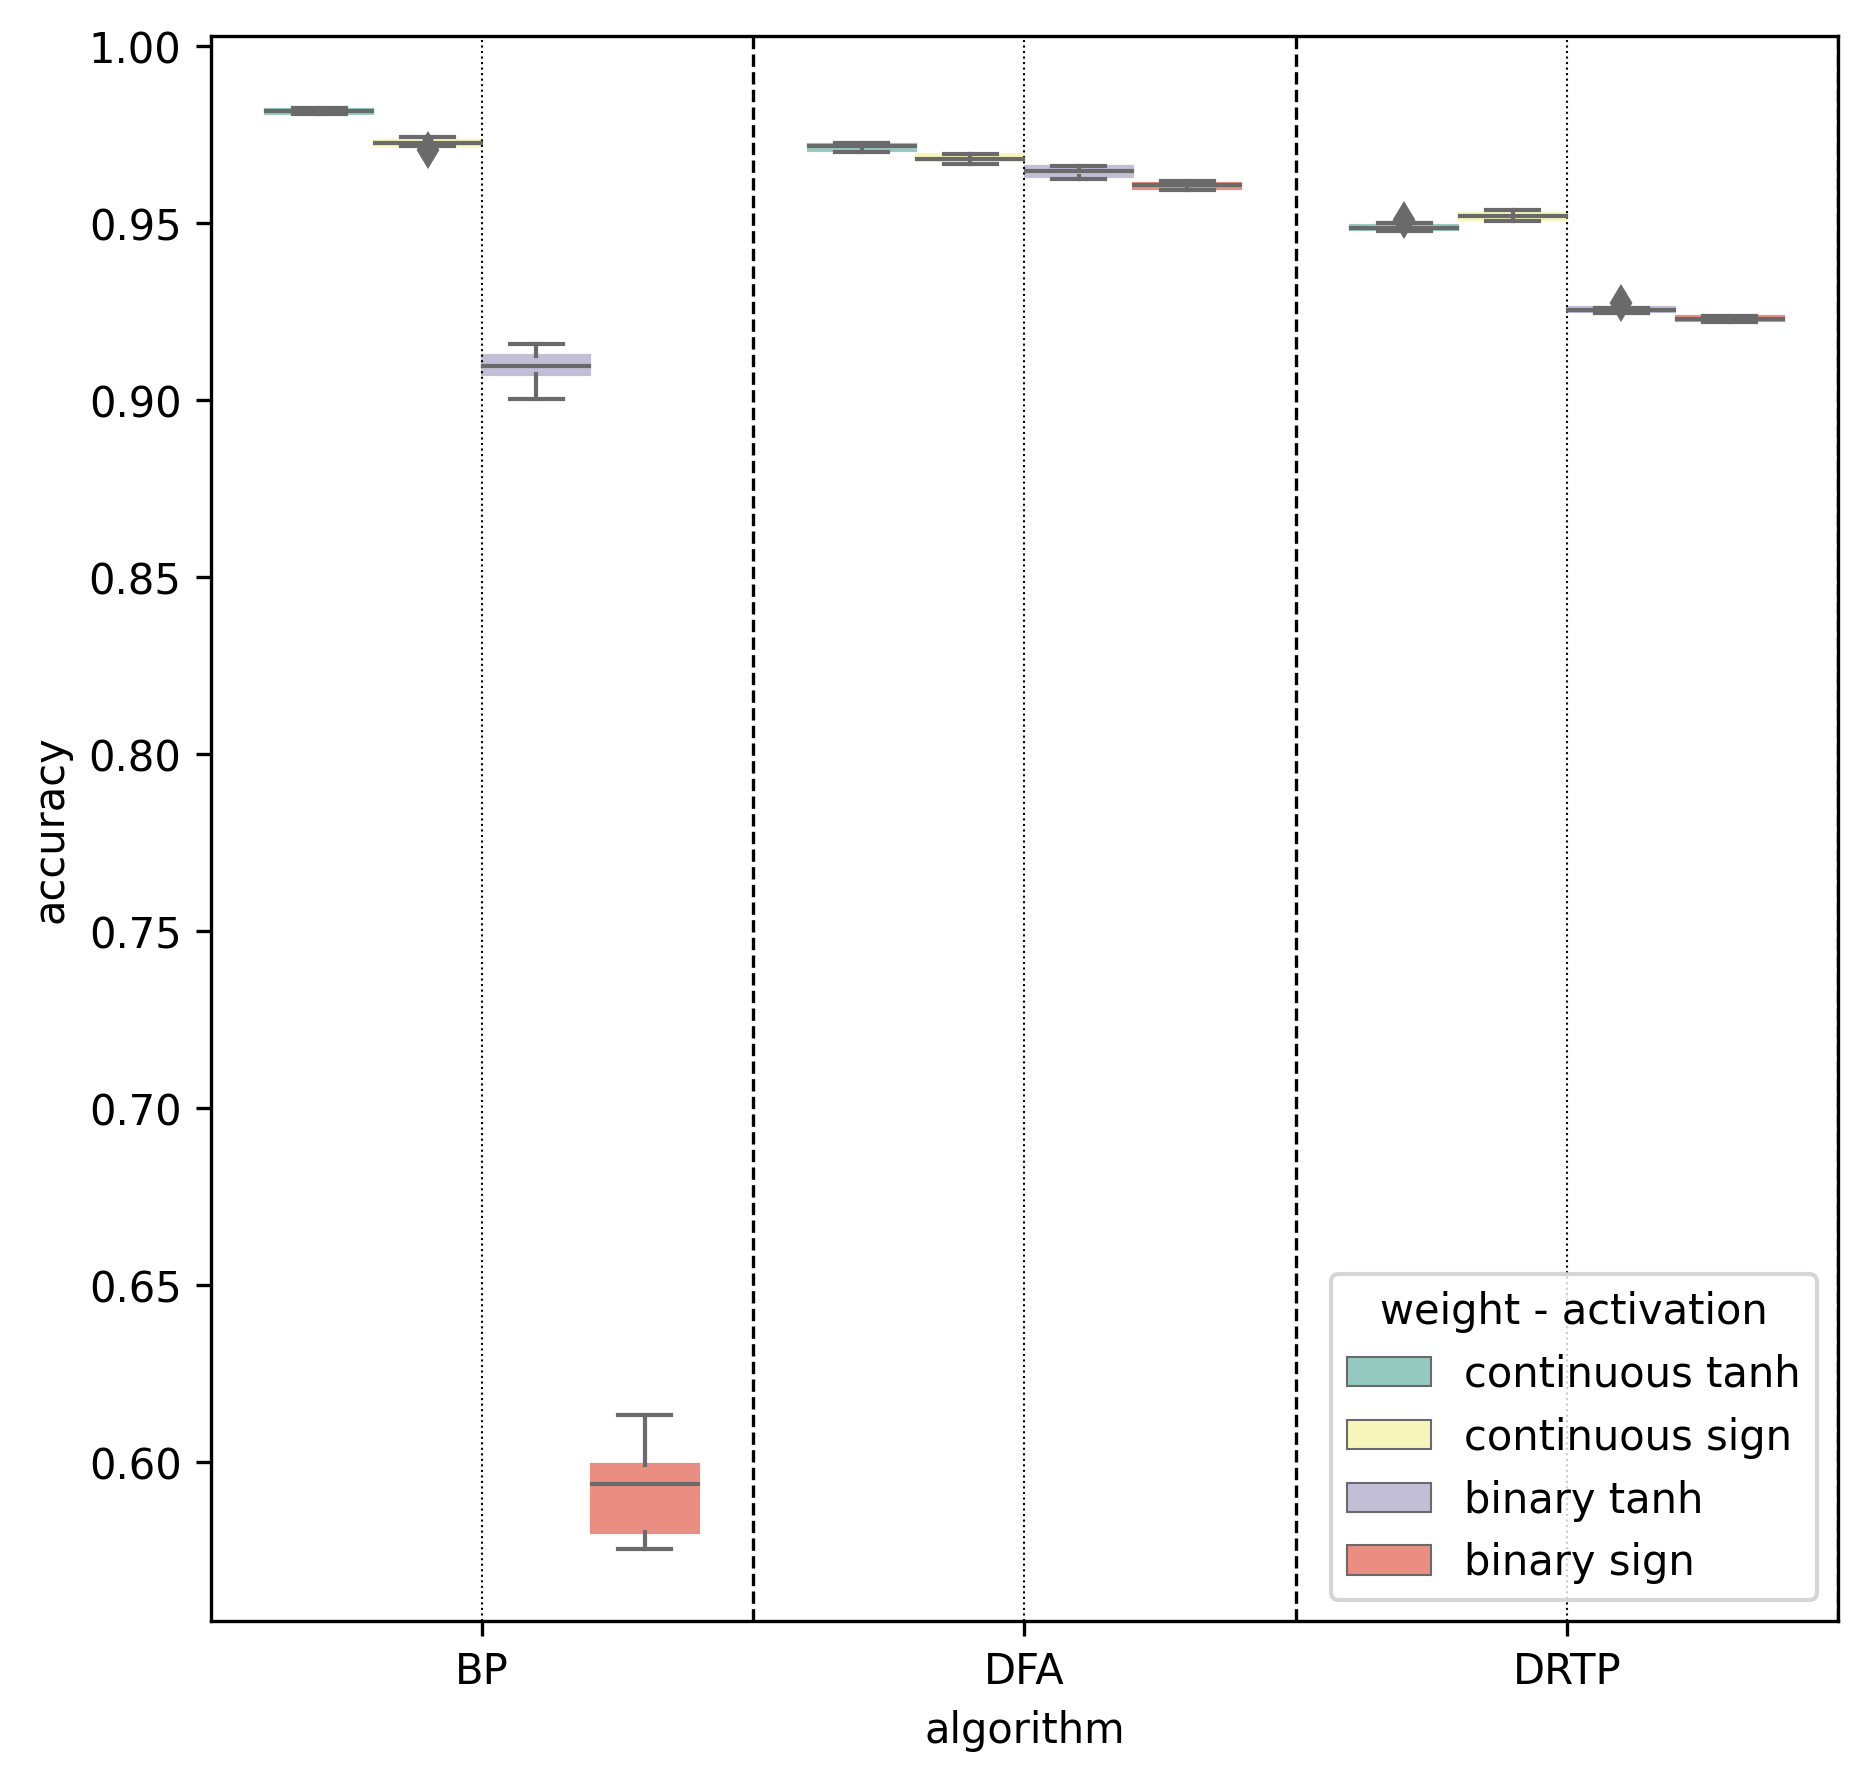

In [28]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=best_epochs, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP))]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

plt.gcf().set_size_inches(7, 7)

BboxTransformTo(
    TransformedBbox(
        Bbox(x0=0.125, y0=0.4117829457364343, x1=0.9, y1=0.88),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                Affine2D().scale(300.0)))))
['INVALID', 'INVALID_AFFINE', 'INVALID_NON_AFFINE', '__add__', '__array__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_boxout', '_invalid', '_invalidate_internal', '_inverted', '_iter_break_from_left_to_right', '_mtx', '_parents', '_shorthand_name', 'contains_branch', 'contains_branch_seperately', 'depth', 'frozen', 'get_affine', 'get_matrix', 'has_inverse', 'input_dims

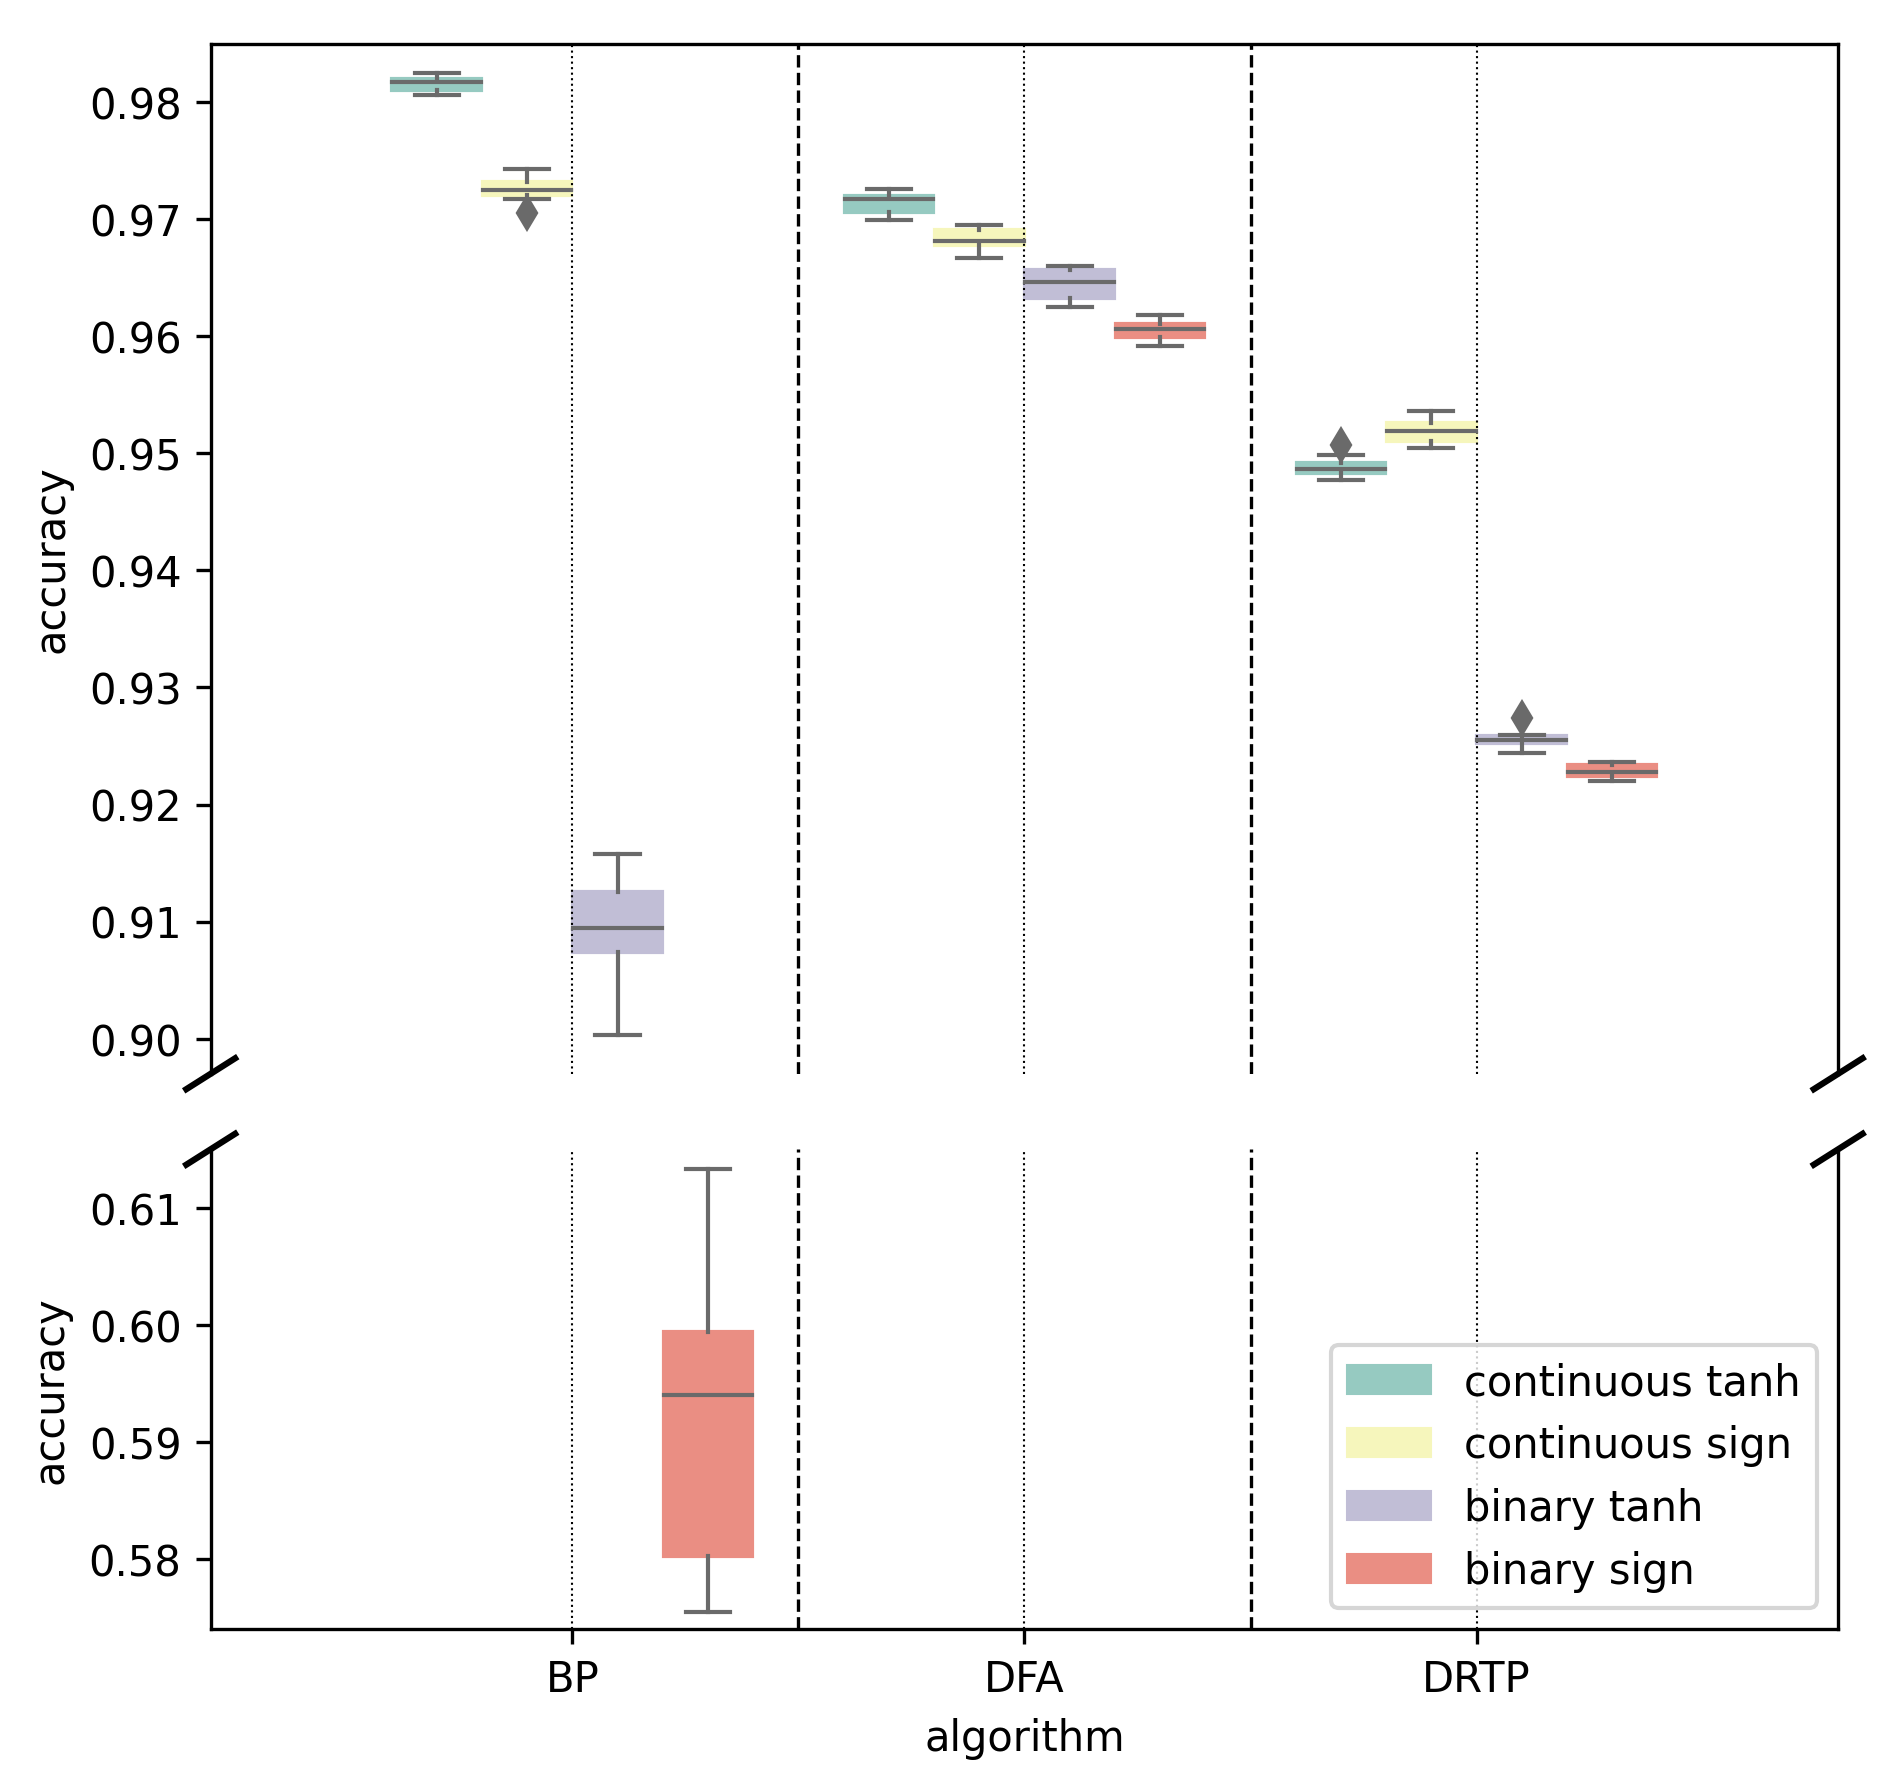

In [29]:
y1 = (.897, 0.985)
y2 = (.574, 0.615)

dy1 = y1[1] - y1[0]
dy2 = y2[1] - y2[0]
ratio = dy1/dy2

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [ratio, 1]})

sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=best_epochs, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0, ax=ax)

sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=best_epochs, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0, ax=ax2)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

for patch in ax2.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax2.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax2.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

ax.set_ylim(*y1)
ax2.set_ylim(*y2)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax.get_legend().remove()
ax.get_xaxis().set_visible(False)

ax2.legend(loc="lower right")

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes,
              color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

from matplotlib.transforms import Affine2D, ScaledTranslation

print(ax.transAxes)
print(dir(ax.transAxes))

pos = ax2.transAxes.transform_affine((0.0, 0.0))

trans = Affine2D.identity().translate(0.0, -1.0)

kwargs.update(
    transform=(trans + Affine2D.identity().scale(1, ratio)) - trans + ax2.transAxes
    #transform=(trans)
)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.subplots_adjust(hspace=0.1)

plt.gcf().set_size_inches(7, 7)

# FASHION MNIST analysis

In [30]:
fmdf = load_file(FASHION_MNIST_RESULTS)

c:\users\crulis\pycharmprojects\binary_nn_tests\venv\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (6,9,14,17,23,24,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [31]:
fmdf2 = process_data(fmdf)

In [32]:
fmdf2.describe()

,epoch,_runtime,initial value,seed,number of parameters,number of epochs,learning rate,batch size,batch/loss,test/f1,train/f1,train/accuracy,test/accuracy,train/precision,test/precision
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.0,12000.0,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,49.500000,6698.407167,0.05875,6.500000,1110800.0,100.0,0.000069,128.0,0.094061,0.822126,0.857607,0.860191,0.824783,0.858534,0.823115
std,28.867273,6607.177905,0.04881,2.872401,0.0,0.0,0.000045,0.0,0.128977,0.102726,0.120258,0.115095,0.097446,0.120793,0.103644
min,0.000000,5.000000,0.00100,2.000000,1110800.0,100.0,0.000001,128.0,0.000144,0.096689,0.103853,0.104583,0.096700,0.105929,0.099283
25%,24.750000,1962.000000,0.00100,4.000000,1110800.0,100.0,0.000010,128.0,0.043940,0.835524,0.850159,0.851508,0.836900,0.851559,0.836788
50%,49.500000,3958.000000,0.10000,6.500000,1110800.0,100.0,0.000100,128.0,0.070846,0.856257,0.880717,0.881333,0.857100,0.881855,0.857222
75%,74.250000,9496.250000,0.10000,9.000000,1110800.0,100.0,0.000100,128.0,0.099007,0.870116,0.924285,0.924308,0.870325,0.925976,0.871180
max,99.000000,27322.000000,0.10000,11.000000,1110800.0,100.0,0.000100,128.0,1.584673,0.899604,0.993094,0.993100,0.899900,0.993112,0.899699


In [33]:
fm_best_epochs = fmdf2.groupby("run_id", as_index=False).max()
fm_best_epochs.rename(columns={"test/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")
fm_best_epochs["weight - activation"] = fm_best_epochs["binary weights"].apply(lambda x: ("binary " if x else "continuous ")) + fm_best_epochs["activation"]

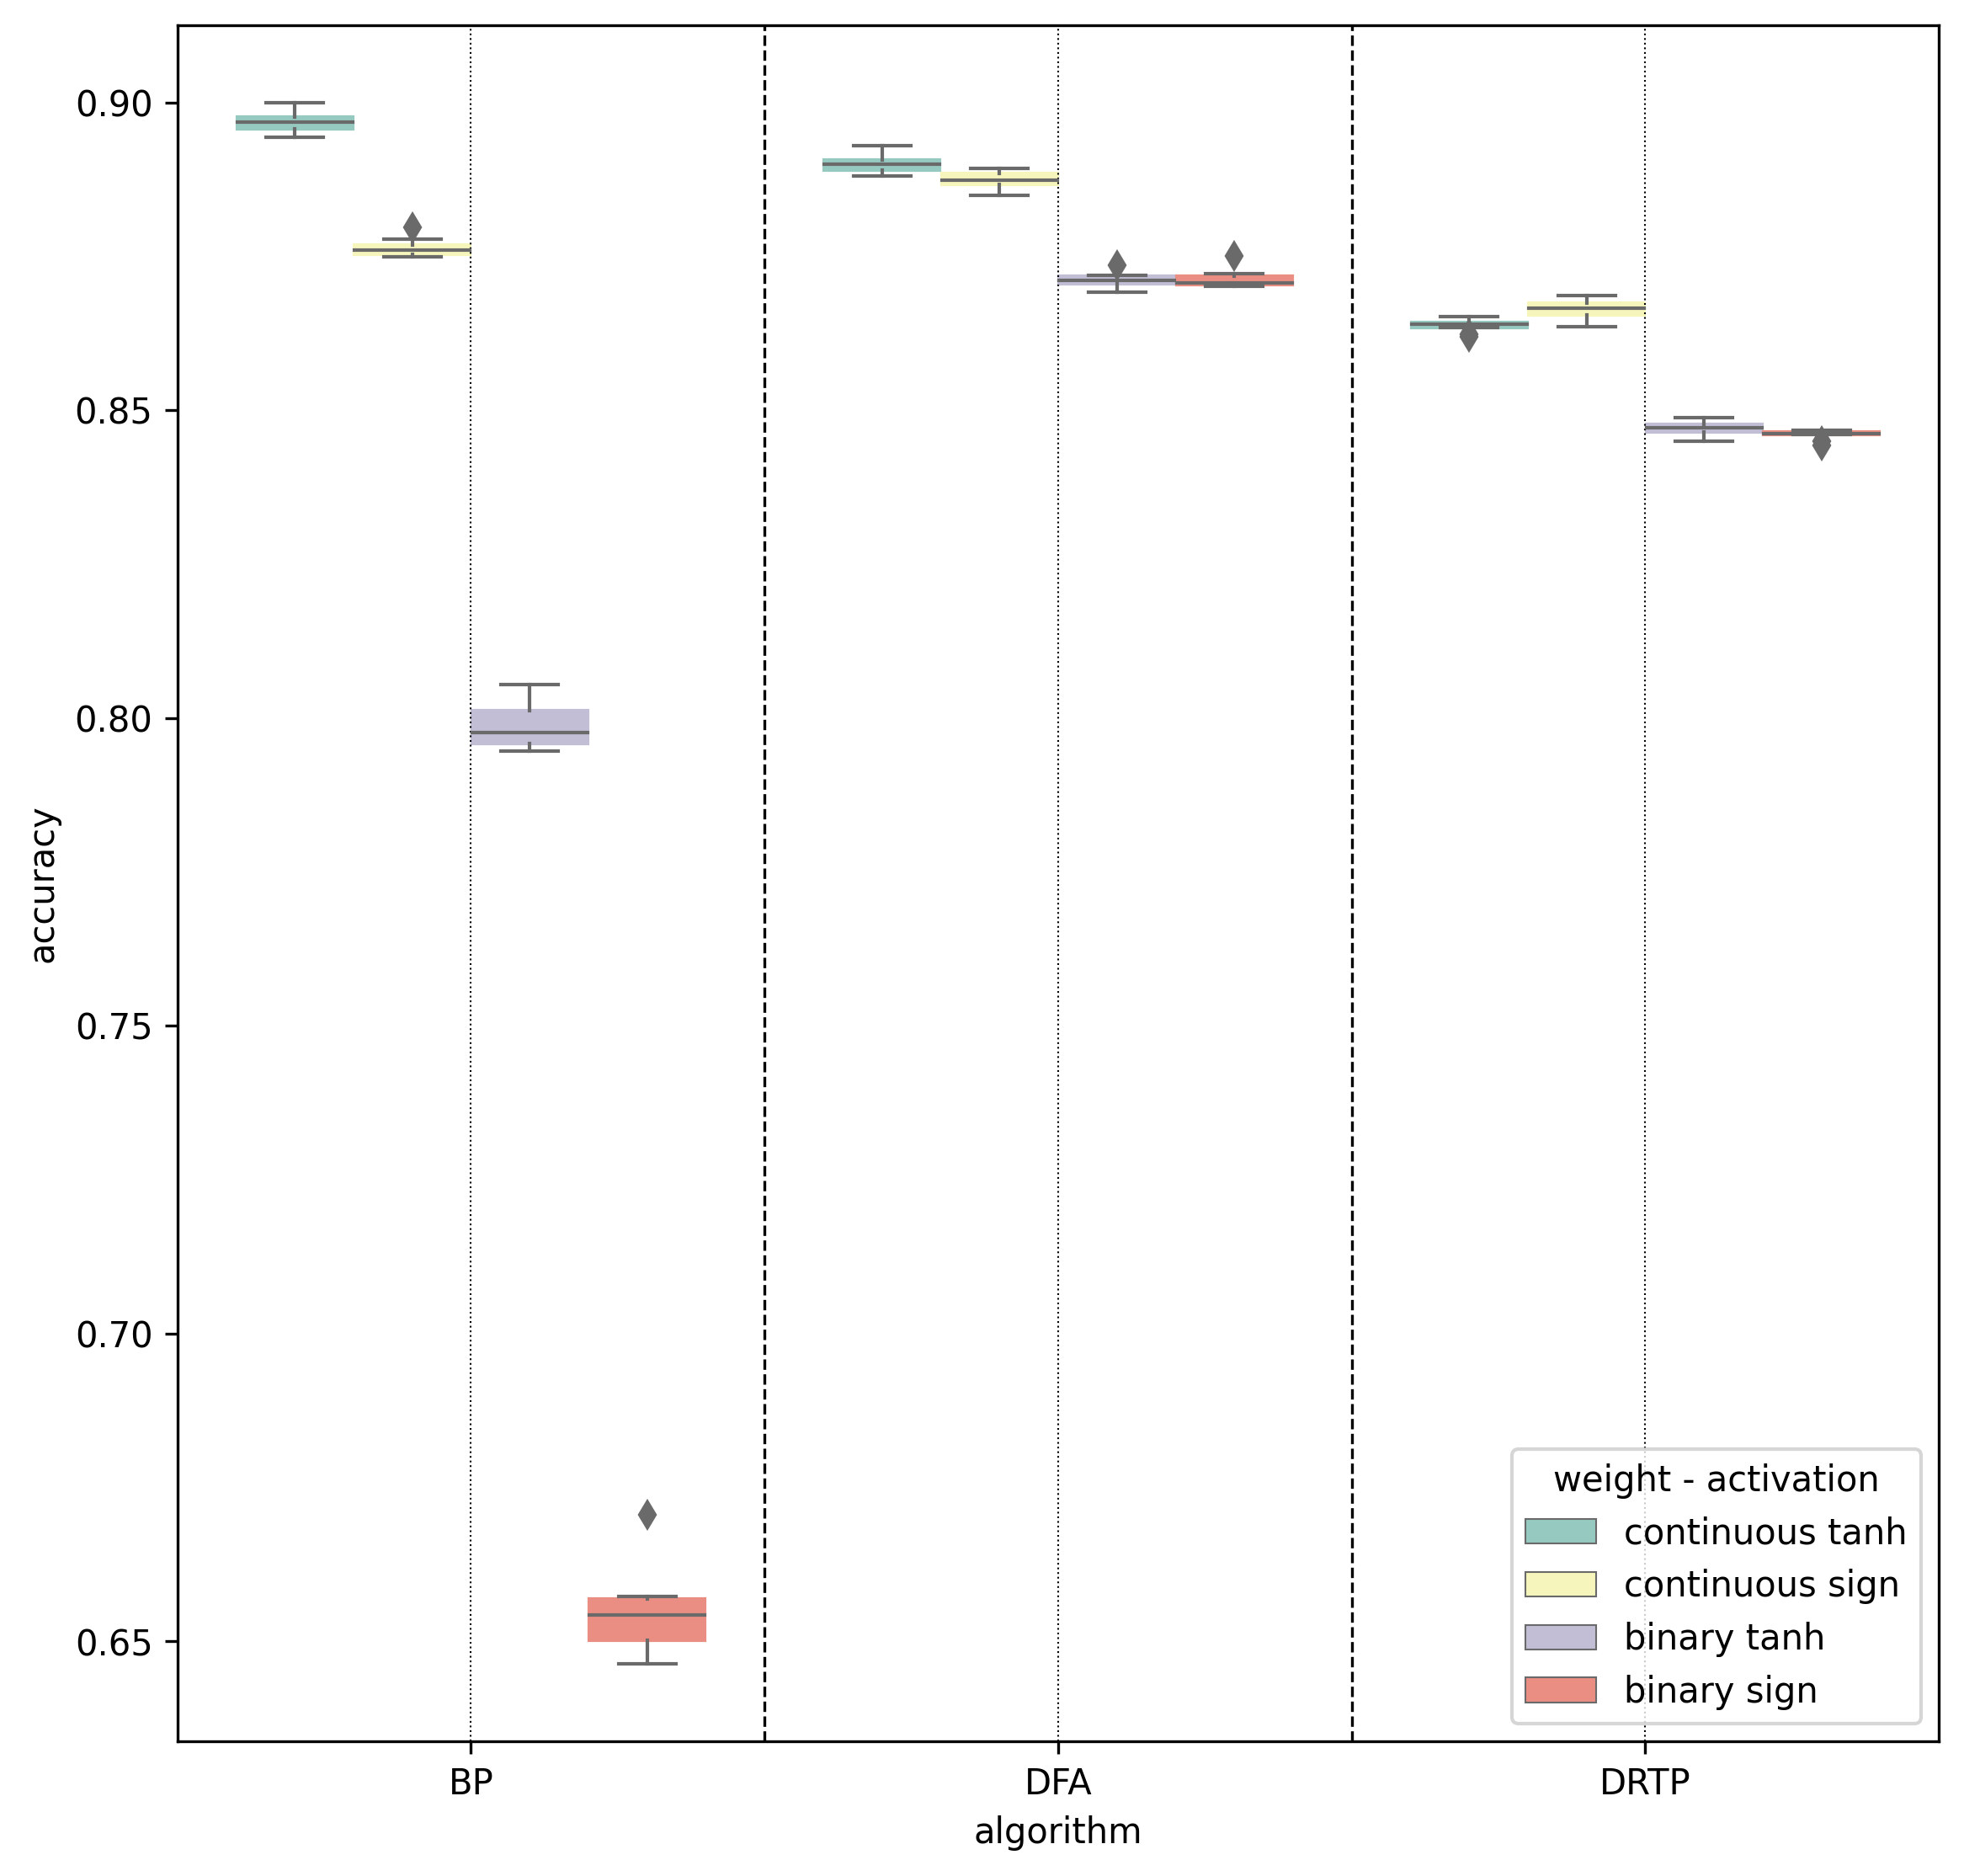

In [34]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=fm_best_epochs, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))
    
[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]


plt.gcf().set_size_inches(9, 9)

BboxTransformTo(
    TransformedBbox(
        Bbox(x0=0.125, y0=0.353787878787879, x1=0.9, y1=0.88),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                Affine2D().scale(300.0)))))
['INVALID', 'INVALID_AFFINE', 'INVALID_NON_AFFINE', '__add__', '__array__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_boxout', '_invalid', '_invalidate_internal', '_inverted', '_iter_break_from_left_to_right', '_mtx', '_parents', '_shorthand_name', 'contains_branch', 'contains_branch_seperately', 'depth', 'frozen', 'get_affine', 'get_matrix', 'has_inverse', 'input_dims'

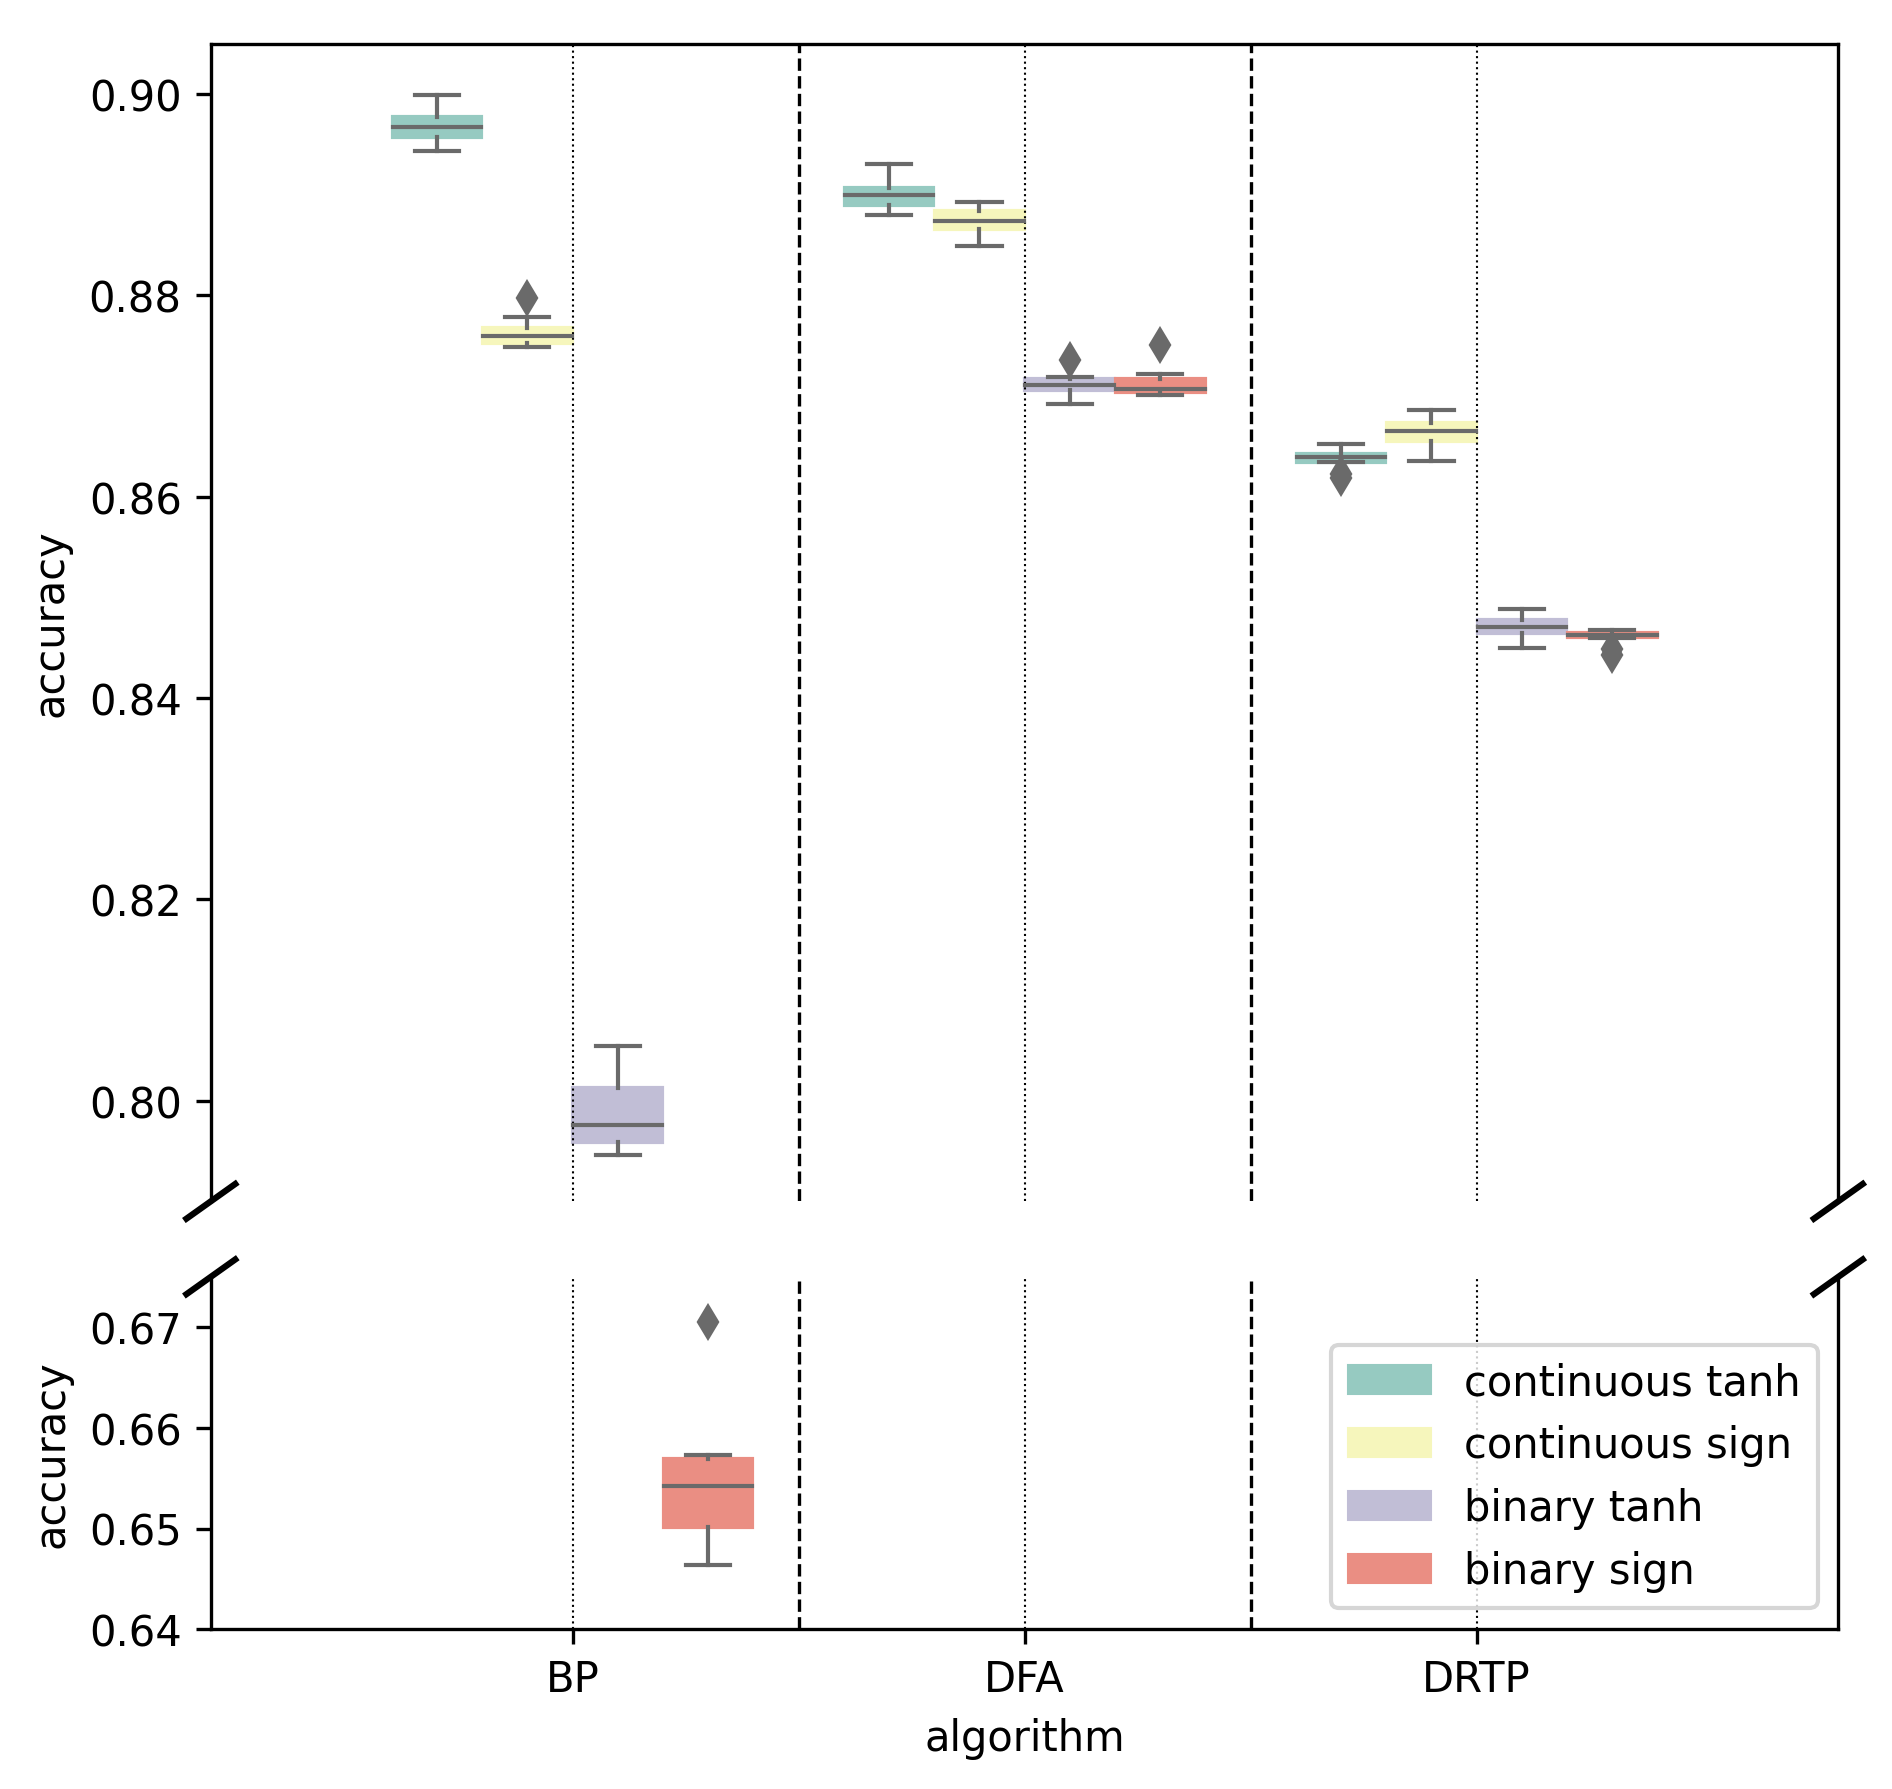

In [35]:
y1 = (.79, 0.905)
y2 = (.64, 0.675)

dy1 = y1[1] - y1[0]
dy2 = y2[1] - y2[0]
ratio = dy1/dy2

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [ratio, 1]})

sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=fm_best_epochs, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0, ax=ax)

sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=fm_best_epochs, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0, ax=ax2)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

for patch in ax2.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax2.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax2.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

ax.set_ylim(*y1)
ax2.set_ylim(*y2)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax.get_legend().remove()
ax.get_xaxis().set_visible(False)

ax2.legend(loc="lower right")

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes,
              color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

from matplotlib.transforms import Affine2D, ScaledTranslation

print(ax.transAxes)
print(dir(ax.transAxes))

pos = ax2.transAxes.transform_affine((0.0, 0.0))

trans = Affine2D.identity().translate(0.0, -1.0)

kwargs.update(
    transform=(trans + Affine2D.identity().scale(1, ratio)) - trans + ax2.transAxes
    #transform=(trans)
)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.subplots_adjust(hspace=0.1)

plt.gcf().set_size_inches(7, 7)

BP False
BP True
DFA False
DFA True
DRTP False
DRTP True


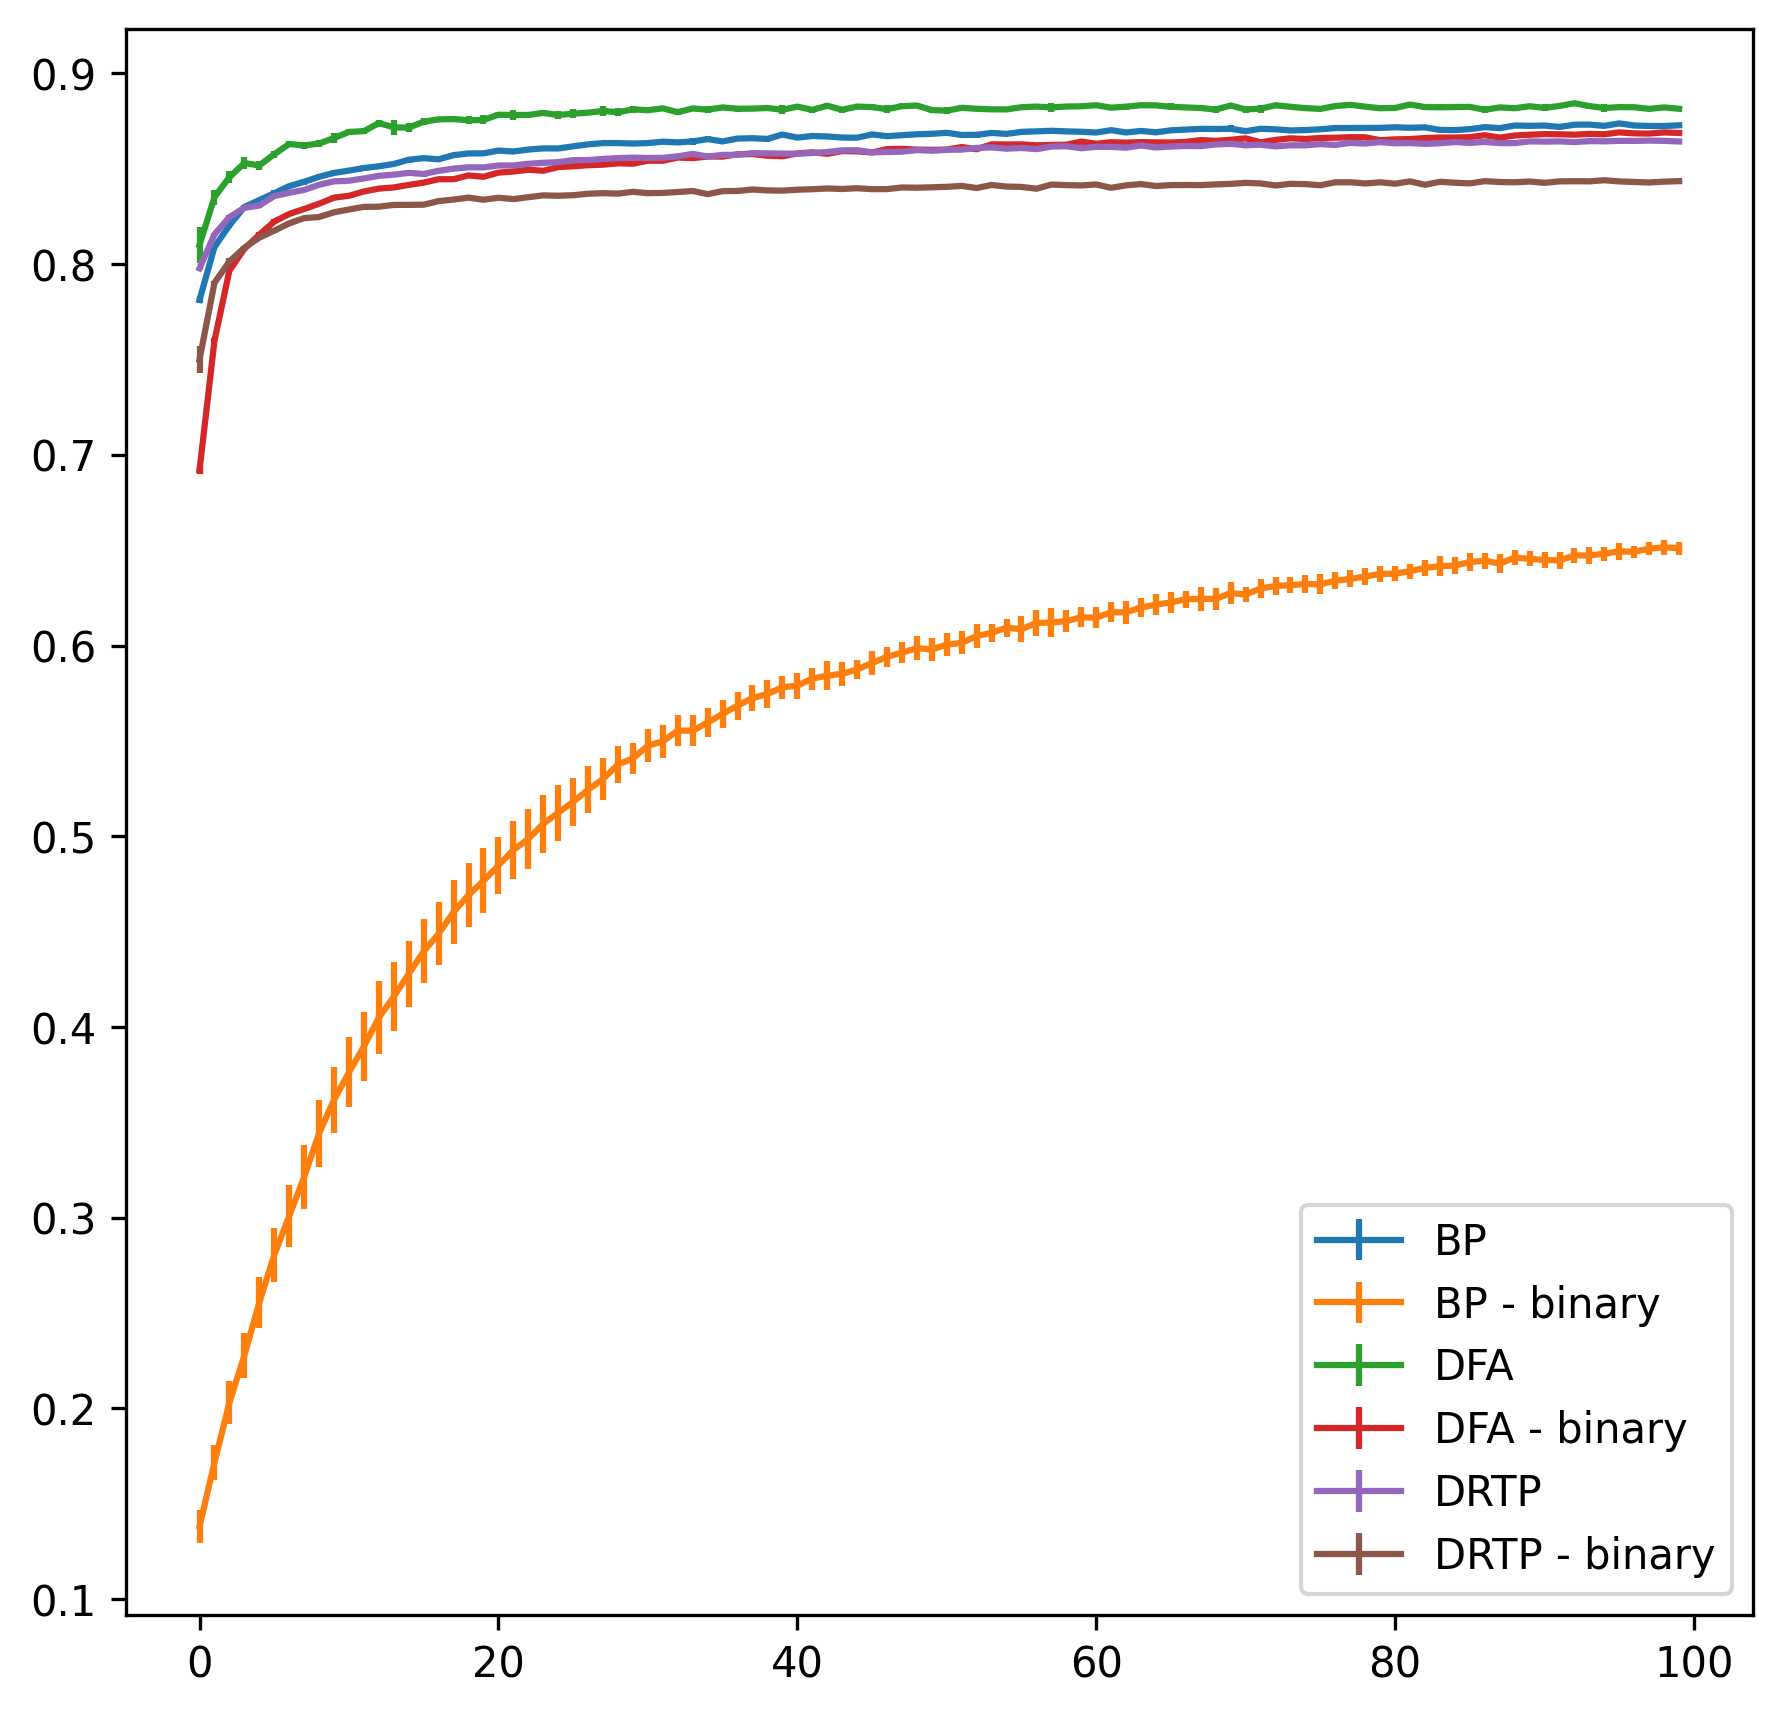

In [36]:
binary_act = fmdf2.loc[fmdf2["hidden activation function"] == "signsat"]

for (algo, binary), df in binary_act.groupby(["algorithm", "binarize weights"]):
    print(algo, binary)
    line = df.groupby("epoch", as_index=False).aggregate(
        mean=("test/accuracy", np.mean),
        std=("test/accuracy", np.std))
    line["std"] *= 0.5
    
    label = f"{algo} - binary" if binary else algo
        
    plt.errorbar("epoch", "mean", yerr="std", data=line, errorevery=1, label=label)

plt.legend()
plt.gcf().set_size_inches(7, 7)

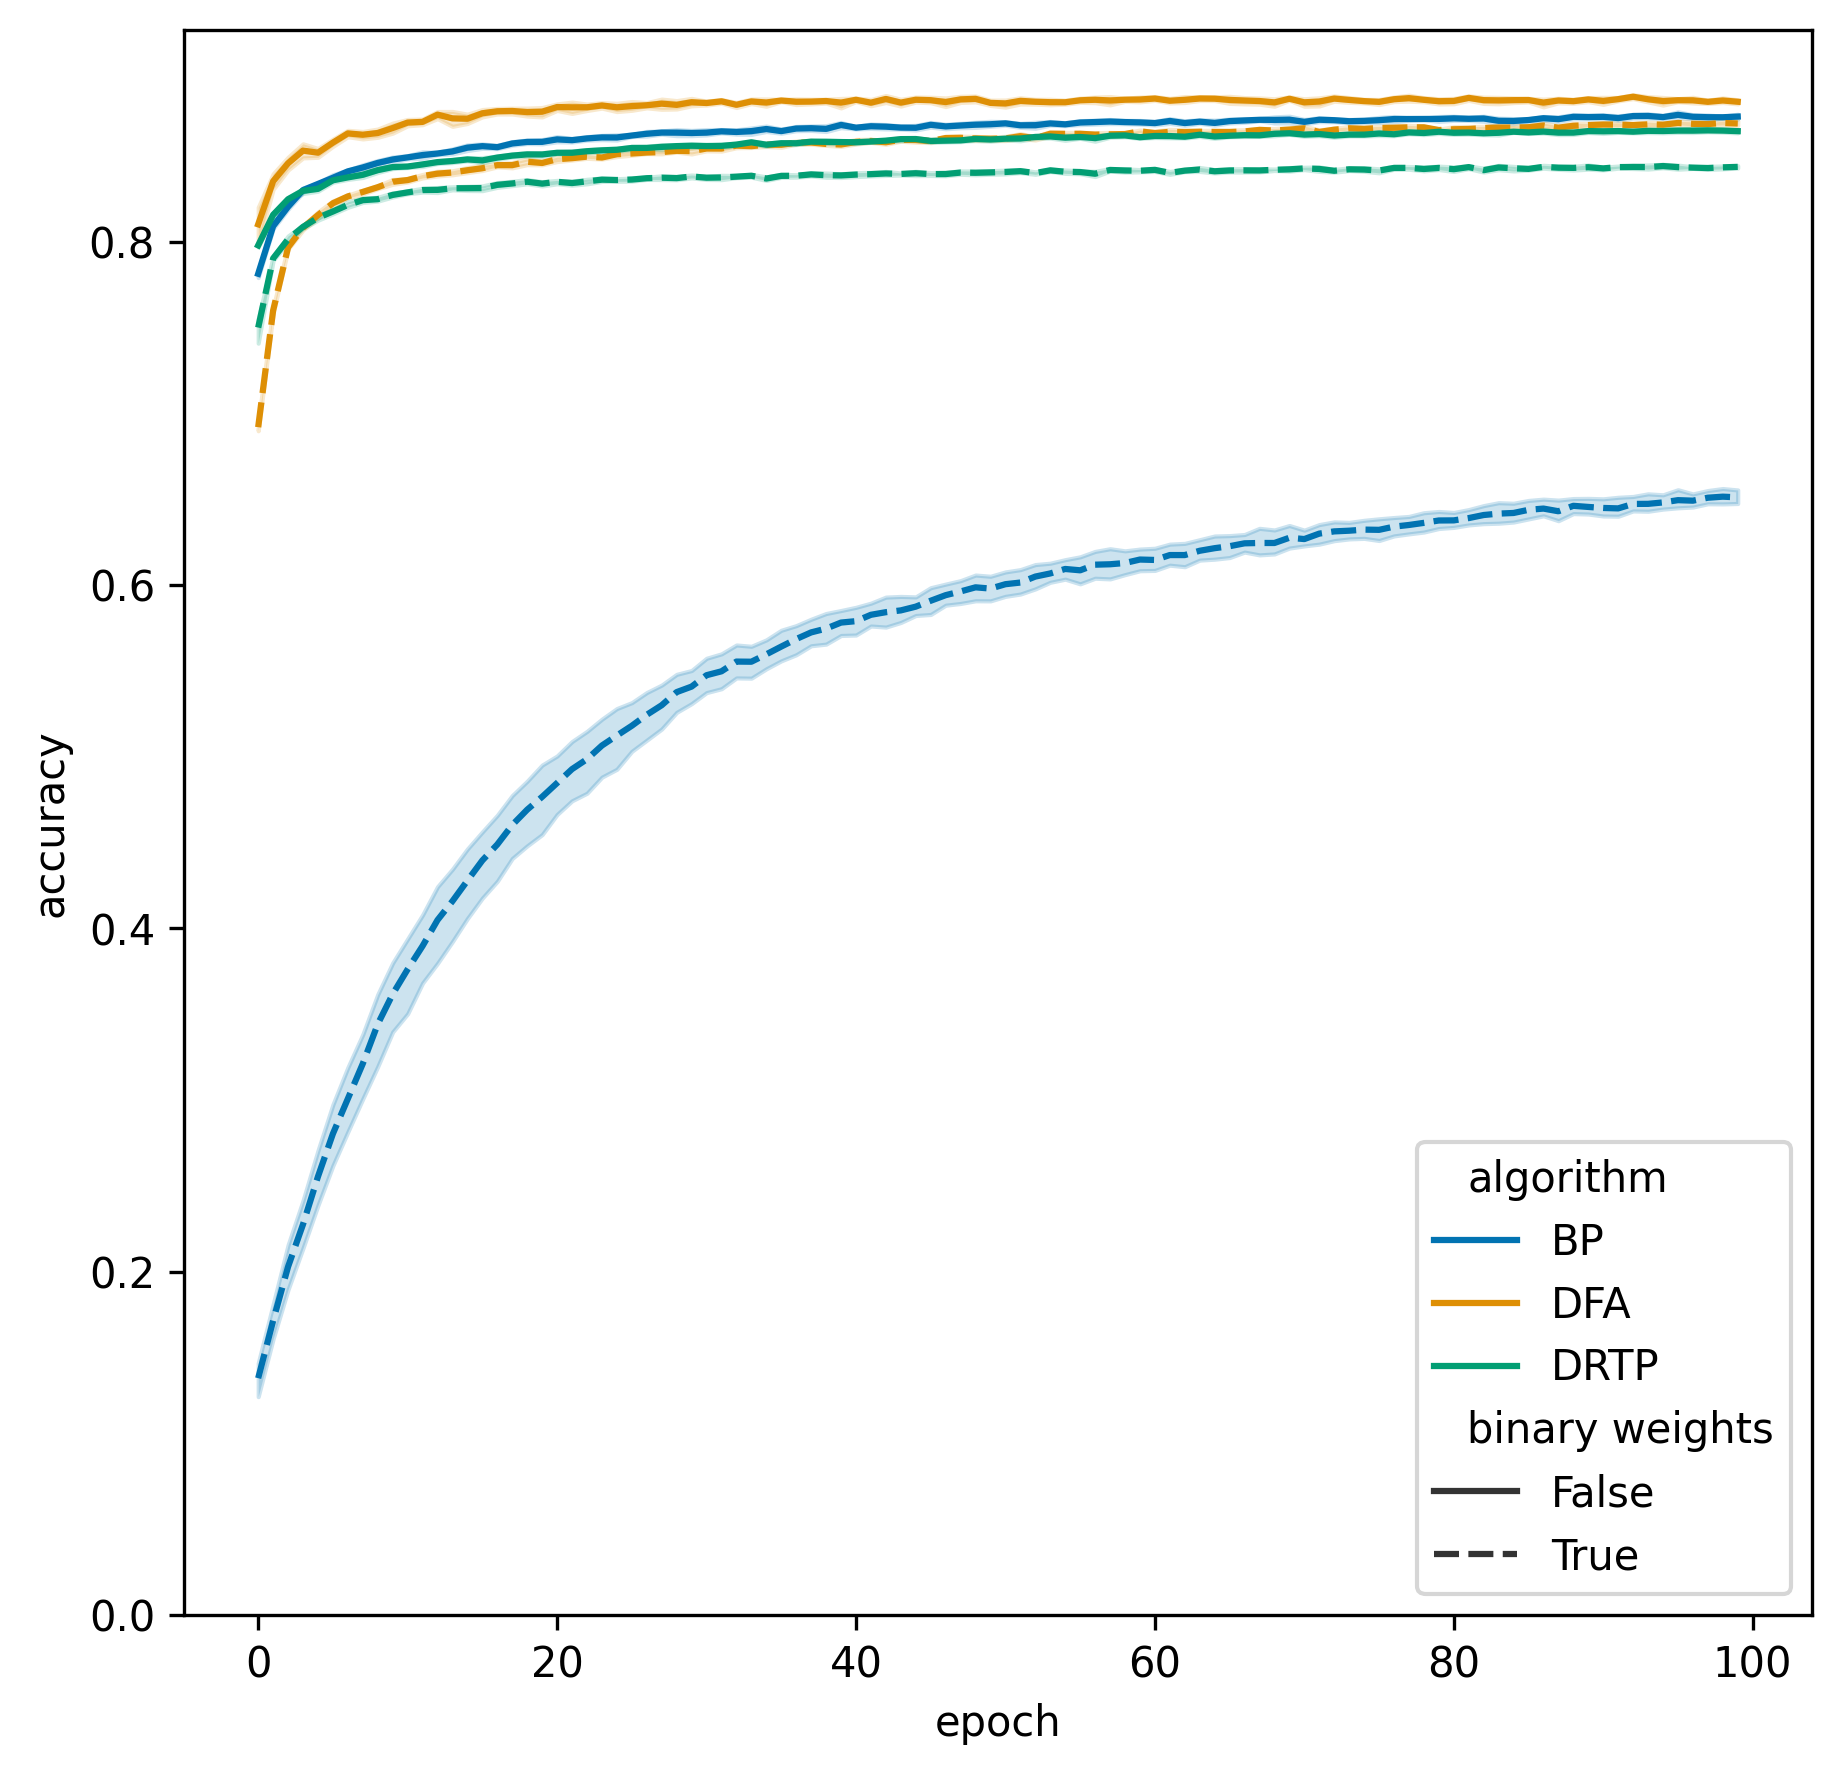

In [37]:
ax = sns.lineplot(x="epoch", y="accuracy",
             hue="algorithm", style="binary weights",
             data=binary_act.rename(columns={"test/accuracy": "accuracy", "binarize weights": "binary weights"}),
             hue_order=ALGO_ORDER,
             palette="colorblind")

ax.set_ylim(ymin=0) # set y axis to start at 0

plt.gcf().set_size_inches(7, 7)

# with batchnorm

In [38]:
GRID_SEARCH_BN_RESULTS = EXPERIMENT_FOLDER / "gridsearch_bn.csv"
MNIST_BN_RESULTS = EXPERIMENT_FOLDER / "mnist_bn.csv"
FASHION_MNIST_BN_RESULTS = EXPERIMENT_FOLDER / "fashion_mnist_bn.csv"

# MNIST

In [39]:
gs_bn_df = load_file(GRID_SEARCH_BN_RESULTS)

c:\users\crulis\pycharmprojects\binary_nn_tests\venv\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (23,27,30,32,33,37,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [40]:
gs_bn_df.columns

Index(['batch/loss', '_runtime', 'epoch', 'test/f1', 'train/f1',
       'train/accuracy', 'test/accuracy', 'train/precision', 'test/precision',
       'run_id', 'hidden activation function', 'batch size', 'initial value',
       'hidden sizes', 'weight clipping', 'weight STE', 'learning rate',
       'binary weights storage', 'weight type', 'number of parameters',
       'binarize weights', 'number of epochs', 'seed', 'architecture',
       'algorithm'],
      dtype='object')

In [41]:
(gs_bn_df["algorithm"].unique(), gs_bn_df["hidden activation function"].unique(), gs_bn_df["binarize weights"].unique(),
gs_bn_df["learning rate"].unique())

(array(['dltp', nan, 'dfa', 'gd', 'drtp'], dtype=object),
 array(['signsat', nan, 'tanh'], dtype=object),
 array([True, nan, False], dtype=object),
 array([1.e-04,    nan, 1.e-06, 1.e-05]))

In [42]:
gs_bn_df2 = process_data(gs_bn_df)

In [43]:
gs_bn_df2

,run_id,epoch,batch/loss,_runtime,test/f1,train/f1,train/accuracy,test/accuracy,train/precision,test/precision,...,learning rate,binary weights storage,weight type,number of parameters,binarize weights,number of epochs,seed,architecture,algorithm,activation
0,0m19xtai,0,0.983759,19.000000,0.973962,0.996289,0.996300,0.9743,0.996283,0.974061,...,0.00001,False,binarised,1114200.0,True,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",BP,tanh
1,0m19xtai,1,0.518849,88.000000,0.883273,0.876873,0.879233,0.8858,0.879513,0.885935,...,0.00001,False,binarised,1114200.0,True,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",BP,tanh
2,0m19xtai,2,0.160690,153.000000,0.973962,0.996289,0.996300,0.9743,0.996283,0.974061,...,0.00001,False,binarised,1114200.0,True,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",BP,tanh
3,0m19xtai,3,0.102781,220.000000,0.973962,0.996289,0.996300,0.9743,0.996283,0.974061,...,0.00001,False,binarised,1114200.0,True,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",BP,tanh
4,0m19xtai,4,0.059513,283.000000,0.973962,0.996289,0.996300,0.9743,0.996283,0.974061,...,0.00001,False,binarised,1114200.0,True,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",BP,tanh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,zvllhz83,95,0.011823,2245.222351,0.947851,0.962026,0.962383,0.9485,0.962021,0.947846,...,0.00001,False,continuous,1114200.0,False,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",DRTP,tanh
9596,zvllhz83,96,0.029427,2269.758901,0.947615,0.962568,0.962900,0.9483,0.962545,0.947683,...,0.00001,False,continuous,1114200.0,False,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",DRTP,tanh
9597,zvllhz83,97,0.046682,2292.544462,0.947615,0.962568,0.962900,0.9483,0.962545,0.947683,...,0.00001,False,continuous,1114200.0,False,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",DRTP,tanh
9598,zvllhz83,98,0.025746,2315.535813,0.947615,0.962568,0.962900,0.9483,0.962545,0.947683,...,0.00001,False,continuous,1114200.0,False,100.0,1.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye...",DRTP,tanh


In [44]:
best_runs_bn = gs_bn_df2.groupby(["seed", "algorithm", "binarize weights", "activation", "initial value", "learning rate"], as_index=False).max()
best_runs_bn.rename(columns={"train/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")

In [45]:
best_runs_bn.columns

Index(['seed', 'algorithm', 'binary weights', 'activation', 'initial value',
       'learning rate', 'run_id', 'epoch', 'batch/loss', '_runtime', 'test/f1',
       'train/f1', 'accuracy', 'test/accuracy', 'train/precision',
       'test/precision', 'hidden activation function', 'batch size',
       'hidden sizes', 'weight clipping', 'weight STE',
       'binary weights storage', 'weight type', 'number of parameters',
       'number of epochs', 'architecture'],
      dtype='object')

In [46]:
best_runs_bn

,seed,algorithm,binary weights,activation,initial value,learning rate,run_id,epoch,batch/loss,_runtime,...,hidden activation function,batch size,hidden sizes,weight clipping,weight STE,binary weights storage,weight type,number of parameters,number of epochs,architecture
0,1.0,BP,False,sign,0.001,0.000001,5k9hjvo3,99,0.999826,2358.482482,...,signsat,128.0,"700,500,300,200",1.0,identity,False,continuous,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
1,1.0,BP,False,sign,0.001,0.000010,x7cqwo95,99,0.061925,2242.859590,...,signsat,128.0,"700,500,300,200",1.0,identity,False,continuous,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
2,1.0,BP,False,sign,0.001,0.000100,xy0v3dpj,99,1.095327,2167.864481,...,signsat,128.0,"700,500,300,200",1.0,identity,False,continuous,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
3,1.0,BP,False,sign,0.100,0.000001,n7dypujo,99,1.364533,2175.164930,...,signsat,128.0,"700,500,300,200",1.0,identity,False,continuous,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
4,1.0,BP,False,sign,0.100,0.000010,70nto4mm,99,1.336712,2168.157459,...,signsat,128.0,"700,500,300,200",1.0,identity,False,continuous,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.0,DRTP,True,tanh,0.001,0.000010,arijkhz6,99,0.986025,8190.000000,...,tanh,128.0,"700,500,300,200",1.0,identity,False,binarised,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
68,1.0,DRTP,True,tanh,0.001,0.000100,3kdoq3ya,99,0.966073,7885.000000,...,tanh,128.0,"700,500,300,200",1.0,identity,False,binarised,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
69,1.0,DRTP,True,tanh,0.100,0.000001,lxglgeho,99,1.163675,7703.000000,...,tanh,128.0,"700,500,300,200",1.0,identity,False,binarised,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."
70,1.0,DRTP,True,tanh,0.100,0.000010,fsfzyri3,99,1.176787,9344.000000,...,tanh,128.0,"700,500,300,200",1.0,identity,False,binarised,1114200.0,100.0,"0: Reshape\n,1: Linear[700]\n,2: BatchNormLaye..."


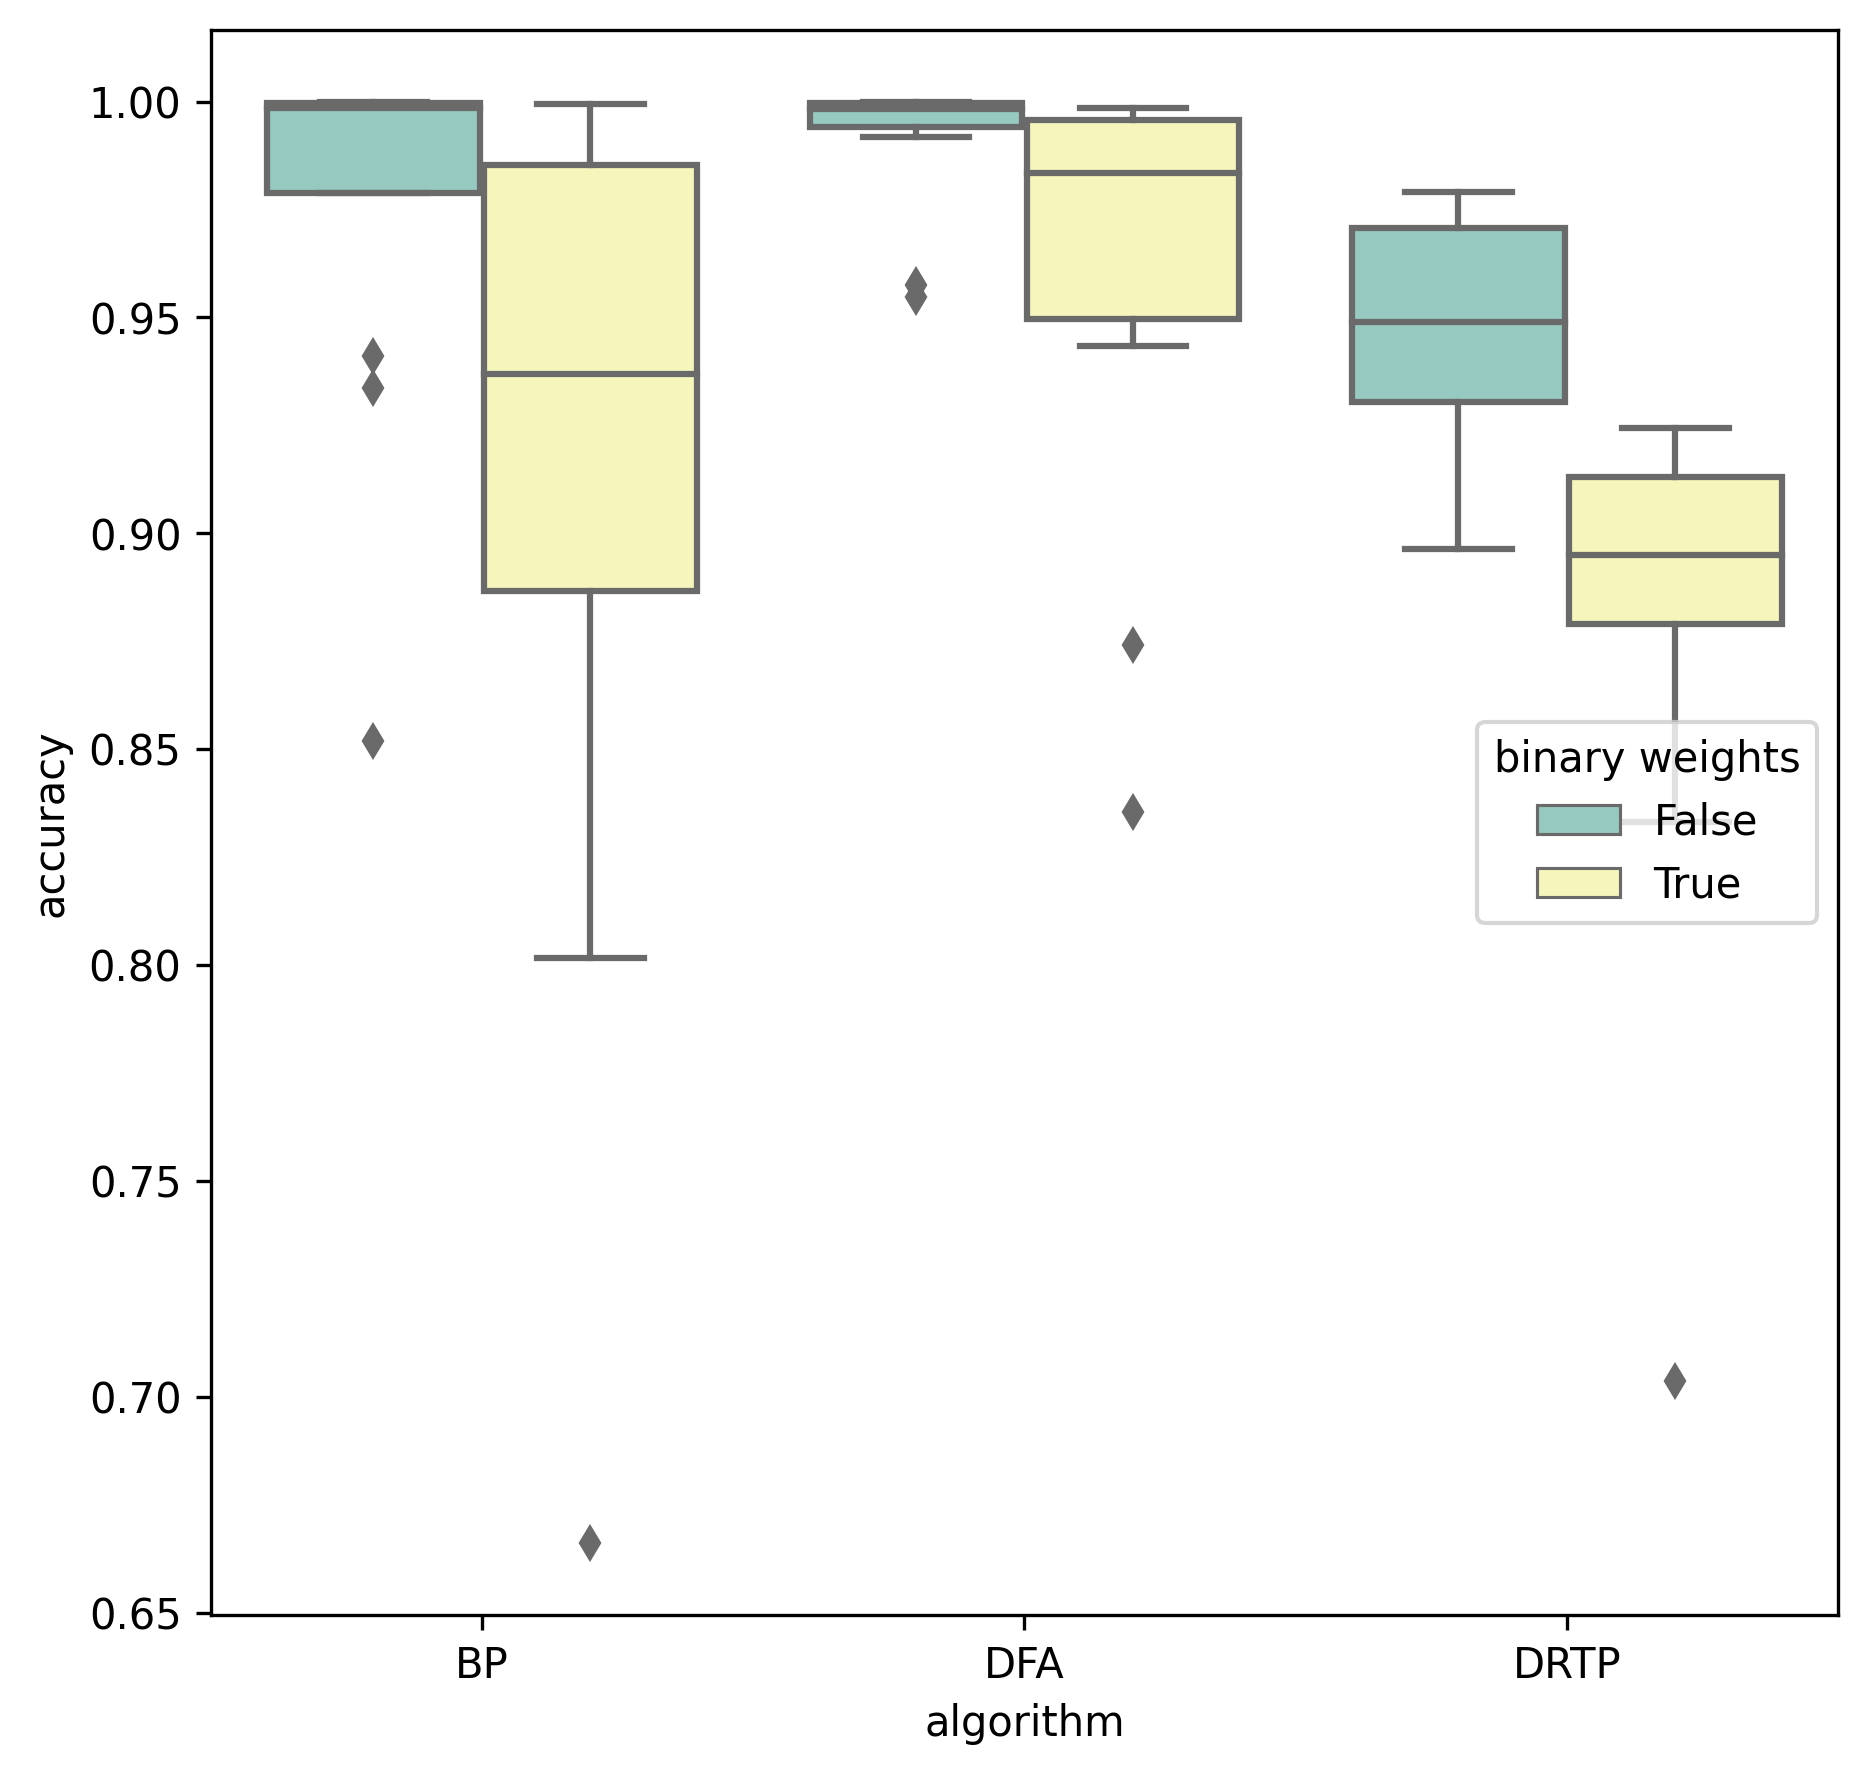

In [47]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="binary weights", data=best_runs_bn, palette="Set3",
           order=ALGO_ORDER)

plt.legend(title="binary weights", loc="center right")
plt.gcf().set_size_inches(7, 7)
#sns.swarmplot(x="algorithm", y="train/accuracy", data=best_runs, color=".25")

# MNIST BATCHNORM

In [48]:
mn_bn_df = load_file(MNIST_BN_RESULTS)

In [49]:
mn_bn_df2 = process_data(mn_bn_df)

In [50]:
best_epochs_mn_bn = mn_bn_df2.groupby("run_id", as_index=False).max()
best_epochs_mn_bn.rename(columns={"test/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")

In [51]:
best_epochs_mn_bn

,run_id,epoch,batch/loss,_runtime,test/f1,train/f1,train/accuracy,accuracy,train/precision,test/precision,...,binary weights,binary weights storage,algorithm,learning rate,weight clipping,batch size,number of parameters,number of epochs,hidden activation function,activation
0,10f0jmd1,99,0.114879,10182.154364,0.973597,0.994870,0.994883,0.9738,0.994913,0.973658,...,True,False,BP,0.00010,1.0,128.0,1114200.0,100.0,signsat,sign
1,10xrdsjc,99,0.039012,2756.541202,0.975372,0.999715,0.999717,0.9756,0.999714,0.975367,...,False,False,DFA,0.00010,1.0,128.0,1114200.0,100.0,signsat,sign
2,11t317gx,99,0.089932,2691.557549,0.955015,0.980228,0.980400,0.9555,0.980303,0.955355,...,False,False,DRTP,0.00010,1.0,128.0,1114200.0,100.0,tanh,tanh
3,12aujnkb,99,0.307897,2610.196158,0.986991,0.999917,0.999917,0.9871,0.999918,0.987051,...,False,False,BP,0.00001,1.0,128.0,1114200.0,100.0,tanh,tanh
4,133ymmij,99,0.426083,2640.535974,0.980500,0.999954,0.999950,0.9806,0.999956,0.980659,...,False,False,DFA,0.00010,1.0,128.0,1114200.0,100.0,tanh,tanh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,wc9ewmkp,99,0.439836,2595.604424,0.985302,0.999917,0.999917,0.9854,0.999919,0.985348,...,False,False,BP,0.00001,1.0,128.0,1114200.0,100.0,tanh,tanh
116,yj581iat,99,0.979822,2882.846584,0.920882,0.922602,0.923550,0.9220,0.923238,0.921218,...,True,False,DRTP,0.00010,1.0,128.0,1114200.0,100.0,tanh,tanh
117,zeaps9sj,99,0.961951,10206.102283,0.969744,0.995084,0.995100,0.9700,0.995104,0.969866,...,True,False,BP,0.00010,1.0,128.0,1114200.0,100.0,signsat,sign
118,zn9hu60z,99,0.940798,2659.834629,0.955435,0.979685,0.979883,0.9560,0.979639,0.955551,...,False,False,DRTP,0.00010,1.0,128.0,1114200.0,100.0,tanh,tanh


In [52]:
best_epochs_mn_bn["weight - activation"] = best_epochs_mn_bn["binary weights"].apply(lambda x: ("binary " if x else "continuous ")) + best_epochs_mn_bn["activation"]

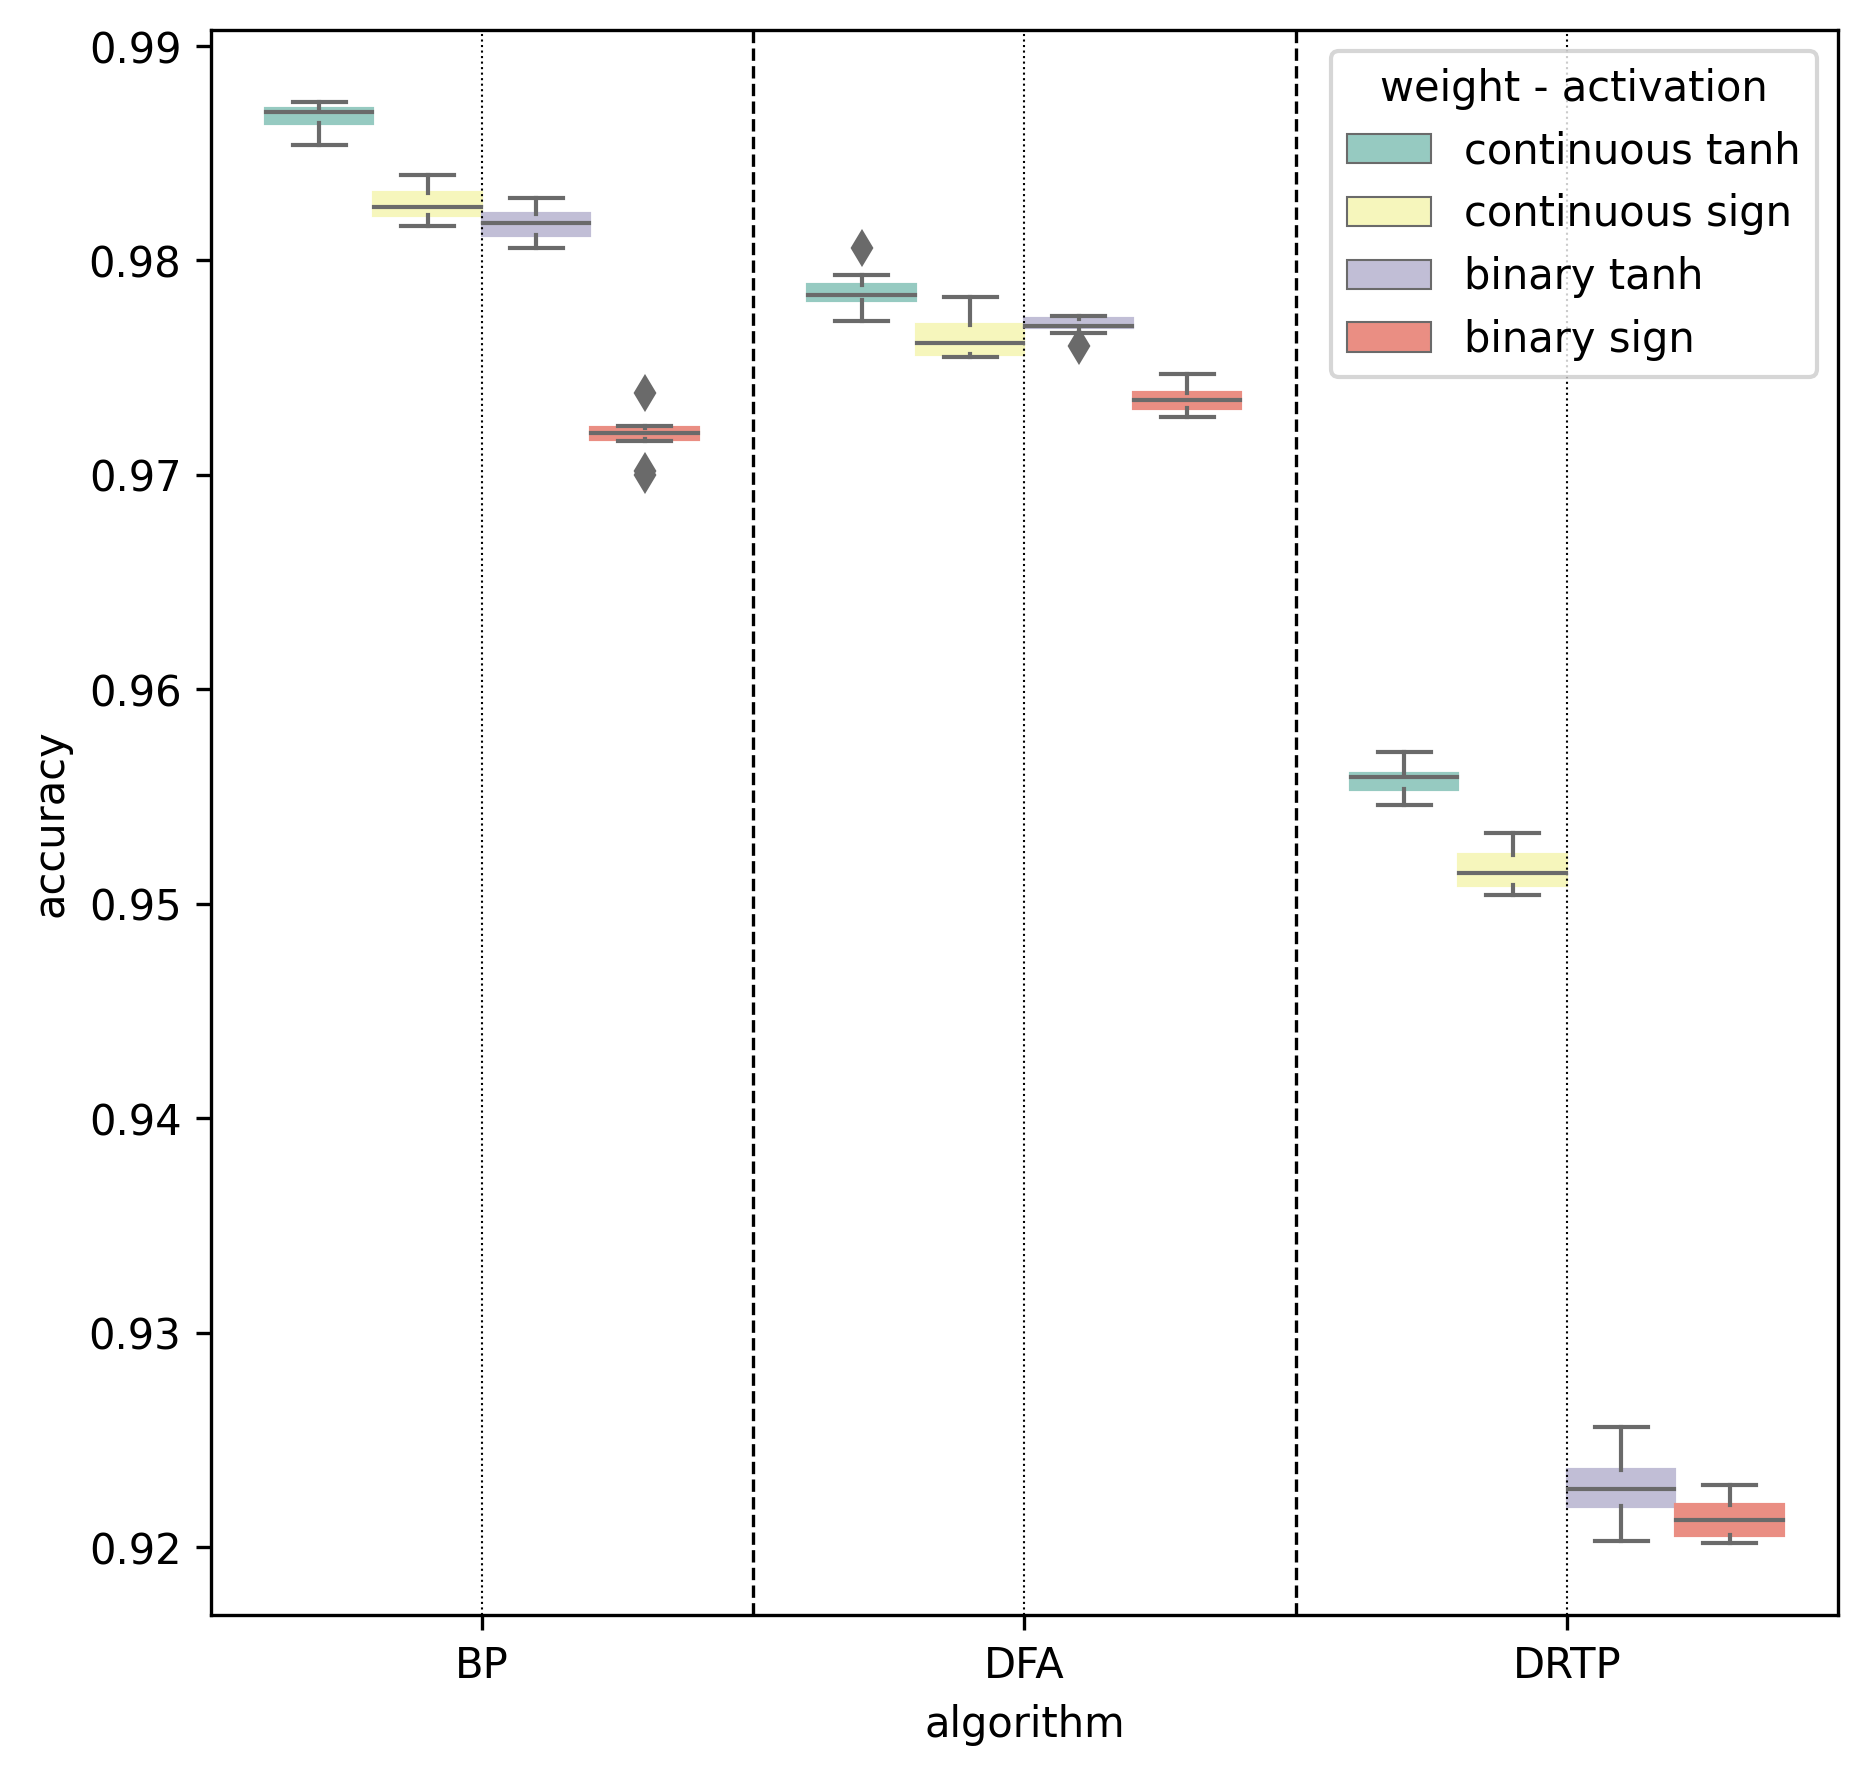

In [53]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=best_epochs_mn_bn, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

plt.gcf().set_size_inches(7, 7)

In [54]:
stats.f_oneway(best_epochs_mn_bn.query("algorithm=='DFA' & `weight - activation`=='binary sign'")["accuracy"],
               best_epochs_mn_bn.query("algorithm=='BP' & `weight - activation`=='binary sign'")["accuracy"])

F_onewayResult(statistic=20.19970685232666, pvalue=0.00028043698773647113)

# FASHION MNIST BN 

In [55]:
fmn_bn_df = load_file(FASHION_MNIST_BN_RESULTS)

In [56]:
fmn_bn_df2 = process_data(fmn_bn_df)

In [57]:
best_epochs_fmn_bn = fmn_bn_df2.groupby("run_id", as_index=False).max()
best_epochs_fmn_bn.rename(columns={"test/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")

In [58]:
best_epochs_fmn_bn["weight - activation"] = best_epochs_fmn_bn["binary weights"].apply(lambda x: ("binary " if x else "continuous ")) + best_epochs_fmn_bn["activation"]

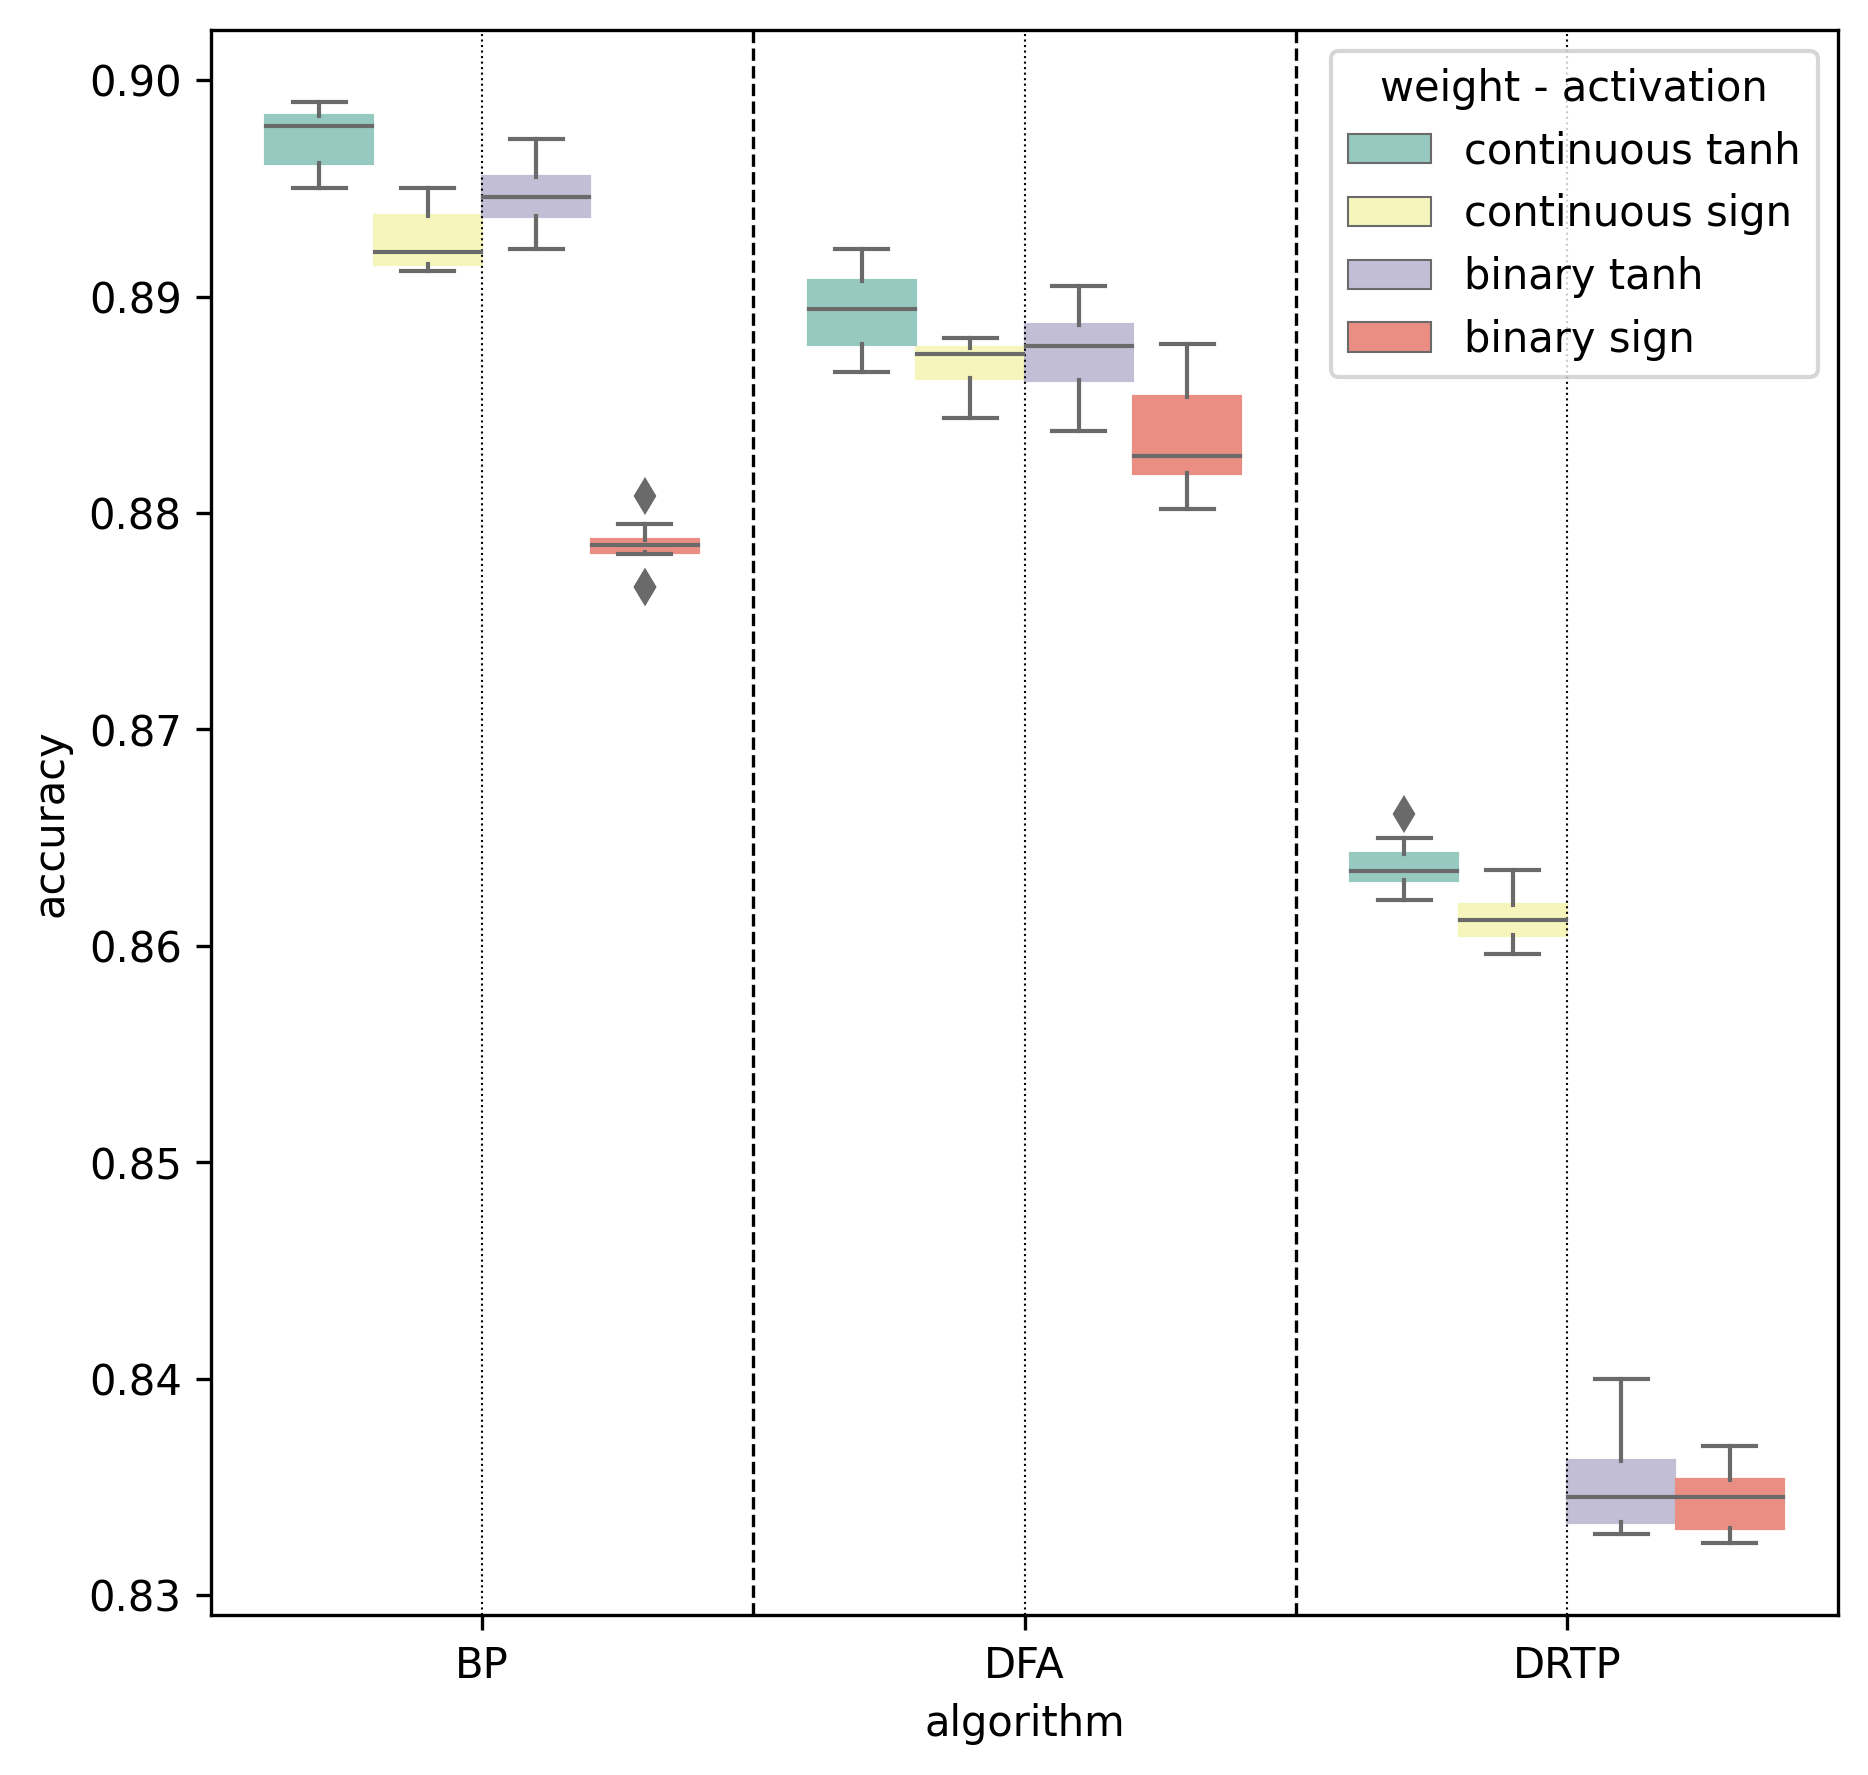

In [59]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=best_epochs_fmn_bn, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

plt.gcf().set_size_inches(7, 7)

In [60]:
stats.f_oneway(best_epochs_fmn_bn.query("algorithm=='DFA' & `weight - activation`=='binary sign'")["accuracy"],
               best_epochs_fmn_bn.query("algorithm=='BP' & `weight - activation`=='binary sign'")["accuracy"])

F_onewayResult(statistic=32.212194669822736, pvalue=2.204886102110919e-05)

# CIFAR10 BN

In [61]:
GRID_SEARCH_CIFAR10_BN_RESULTS = EXPERIMENT_FOLDER / "gridsearch_bn_cifar10.csv"
CIFAR10_BN_RESULTS = EXPERIMENT_FOLDER / "cifar10_bn.csv"

In [62]:
c10_bn_df = load_file(CIFAR10_BN_RESULTS)

c:\users\crulis\pycharmprojects\binary_nn_tests\venv\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (24,32,34,35,36,37,38,42) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [63]:
c10_bn_df2 = process_data(c10_bn_df)

In [64]:
best_epochs_c10_bn = c10_bn_df2.groupby("run_id", as_index=False).max()
best_epochs_c10_bn.rename(columns={"test/accuracy": "accuracy", "binarize weights": "binary weights"}, inplace=True, errors="ignore")

In [65]:
best_epochs_c10_bn["weight - activation"] = best_epochs_c10_bn["binary weights"].apply(lambda x: ("binary " if x else "continuous ")) + best_epochs_c10_bn["activation"]

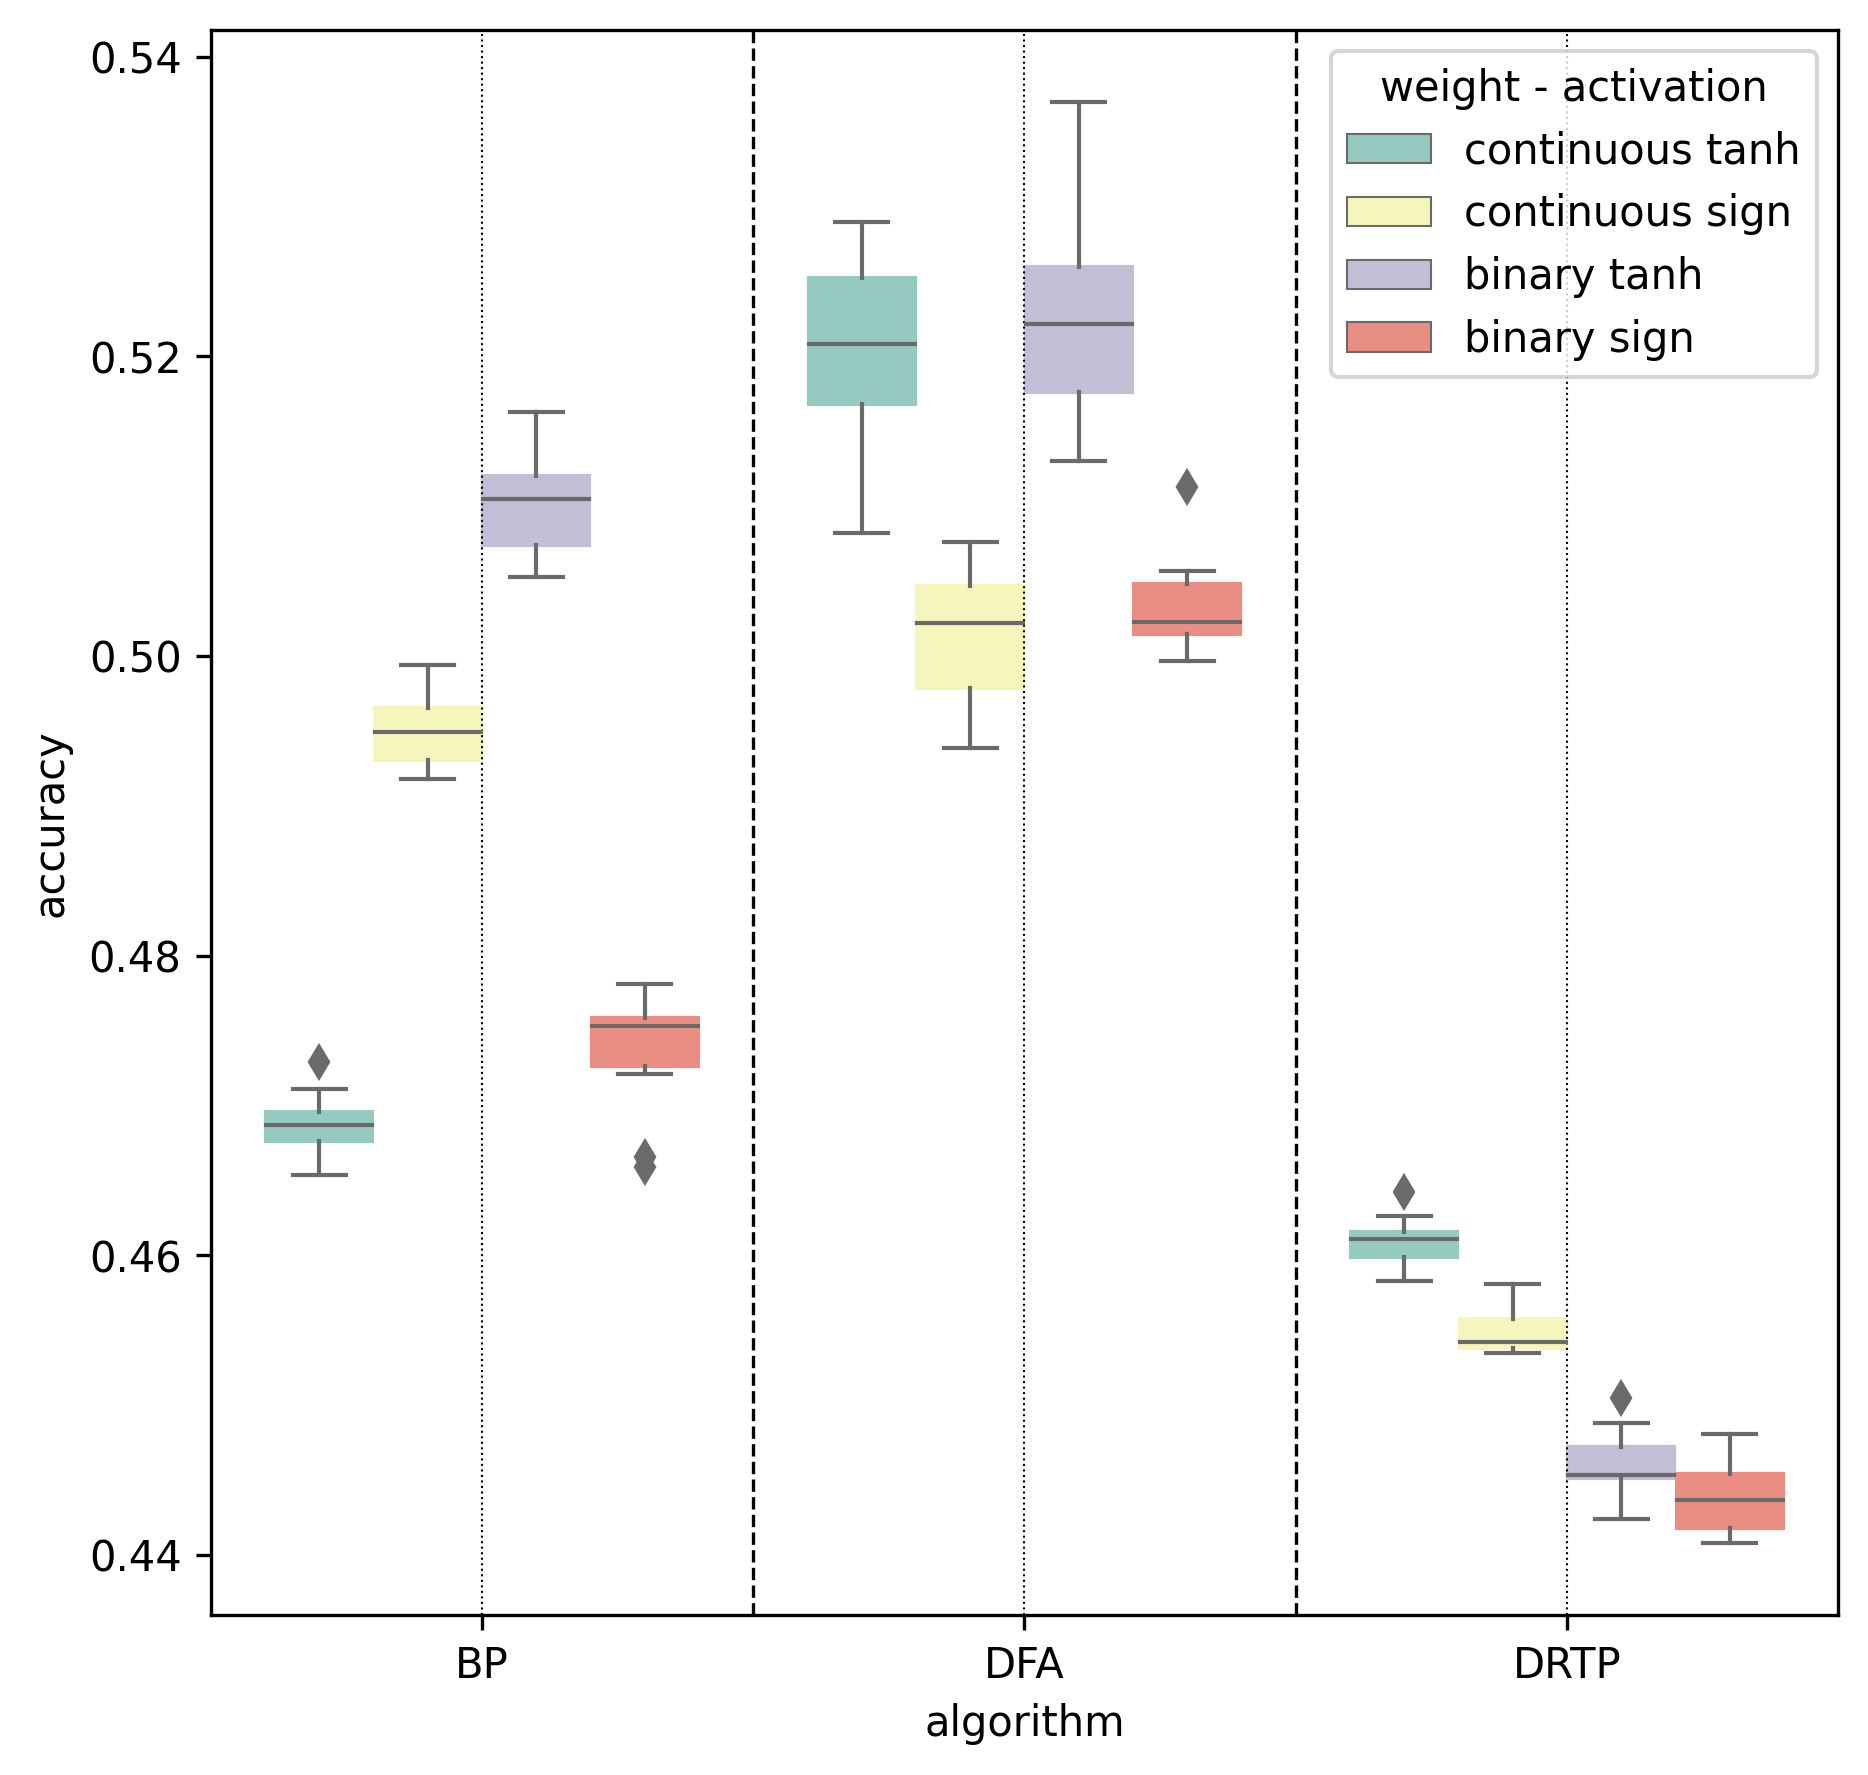

In [66]:
ax = sns.boxplot(x="algorithm", y="accuracy", hue="weight - activation", data=best_epochs_c10_bn, palette="Set3",
            hue_order=["continuous tanh", "continuous sign", "binary tanh", "binary sign"],
            order=ALGO_ORDER,
            linewidth=1.0)

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set(edgecolor=(r,g,b,1.0))

[ax.axvline(x+0.5, color = 'black', linewidth=0.8, linestyle='--') for x in range(len(ALGORITHMS_TO_KEEP)-1)]
[ax.axvline(x, color = 'black', linewidth=0.5, linestyle='dotted') for x in range(len(ALGORITHMS_TO_KEEP))]

plt.gcf().set_size_inches(7, 7)

In [67]:
stats.f_oneway(best_epochs_c10_bn.query("algorithm=='DFA' & `weight - activation`=='binary sign'")["accuracy"],
               best_epochs_c10_bn.query("algorithm=='BP' & `weight - activation`=='binary sign'")["accuracy"])

F_onewayResult(statistic=313.0004221041887, pvalue=7.909911057395617e-13)

In [69]:
best_epochs_mn_bn.pivot_table("accuracy", "weight - activation", "algorithm")

algorithm,BP,DFA,DRTP
weight - activation,,,
binary sign,0.97180,0.97355,0.92131
binary tanh,0.98172,0.97694,0.92269
continuous sign,0.98266,0.97639,0.95164
continuous tanh,0.98670,0.97858,0.95579


In [68]:
best_epochs_c10_bn.pivot_table("accuracy", "weight - activation", "algorithm")

algorithm,BP,DFA,DRTP
weight - activation,,,
binary sign,0.47355,0.50338,0.44399
binary tanh,0.51042,0.52264,0.44603
continuous sign,0.49507,0.50115,0.45506
continuous tanh,0.46877,0.52073,0.46095
